<a href="https://colab.research.google.com/github/nurrizkyimani/nlp-clickbait-transfers/blob/main/EXP24_Dec_26_REAL1024_scheduler_mix_adam_sgd_DROPOUT_LR_LOW_TEST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [4]:
# from google.colab import drive
# drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
!pip install torchtext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install --upgrade numpy
!pip3 install fse
!pip3 install pytorch-nlp
!pip install torchmetrics
# conda install -c anaconda nltk
#  conda install -c anaconda pandas
# conda create -n sklearn-env -c conda-forge scikit-learn
# conda activate sklearn-env
# conda install pytorch torchvision torchaudio -c pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.3 MB 40.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 8.6 MB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
     |████████████████████████████████| 56.8 MB 1.2 MB/s 
     |████████████████████████████████| 182 kB 68.6 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 16.9 MB 76.5 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Created wheel for fse: filename=fse-1.0.0-cp38-cp38-linux_x86_64.whl size=256608 sha256=b0f55ced42f9a59ddbc9a5b4bba57818c586c5f1a63f9072a4c694098b087e96
  Stored in directory: /root/.cache/pip/wheels/c8/6b/c6/8fd0c371410cf2f70f57dc53f127423d443dea6238b8764a0e
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=b1f2e8f669235be4a632ea2e6a16cb74e9868fbd9168c99b74d1a6d8ee75b469
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 8.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 34.8 MB/s 


# Import Libraries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import re
import string
import collections
# import fse
import random

import random
import math
import time

import itertools
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchnlp.metrics import get_moses_multi_bleu

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(1)

import nltk
nltk.download('punkt')

import nltk
from nltk.util import ngrams
nltk.download('punkt')
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# Any results you write to the current directory are saved as output.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# !wget "https://storage.googleapis.com/babert-pretraining/IndoNLU_finals/models/fasttext/fasttext.4B.id.300.epoch5.uncased.bin" -P "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer"

# Importing Dataset GDrive

In [1]:
# import dataset from google drive
path = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/annotated/combined/csv/"
all_agree_path = path + "main.csv"
all_agree_pd = pd.read_csv(all_agree_path)
df_clickbait = all_agree_pd[all_agree_pd['label'] == "clickbait"]
df_nonclickbait = all_agree_pd[all_agree_pd['label'] == "non-clickbait"]
df_both = pd.concat((df_clickbait, df_nonclickbait), ignore_index=True)

df_both_copy = df_both.copy()
df_both_copy['label'] = df_both_copy['label'].astype('category')
df_both_copy.head(-1)

NameError: ignored

# Importing dataset

In [2]:
# # Import the csv
# all_agree_path = "2022_thesis_styletransfer/annotated/combined/csv/main.csv"
# all_agree_pd = pd.read_csv(all_agree_path)
# df_clickbait = all_agree_pd[all_agree_pd['label'] == "clizckbait"]
# df_nonclickbait = all_agree_pd[all_agree_pd['label'] == "non-clickbait"]
# df_both = pd.concat((df_clickbait, df_nonclickbait), ignore_index=True)

# df_both_copy = df_both.copy()
# df_both_copy['label'] = df_both_copy['label'].astype('category')
# df_both_copy.head(-1)

In [3]:
df_both_label = df_both_copy.drop('label_score', axis=1)
df_both = df_both_copy.drop('label', axis=1)
df_both.head(-5)

NameError: ignored

In [ ]:
len(df_both)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_both_copy['label_encoding'] = labelencoder.fit_transform(df_both_copy['label'])
df_encode_clean = df_both_copy.copy()
df_encode_clean = df_both = df_both_copy.drop(['label_score'], axis=1)
df_encode_clean.head()

# Preprocessing : Lower Casing

In [ ]:
# preprocessing : lower casing
df_encode_clean['title'] = df_encode_clean['title'].str.lower()
df_encode_clean.title

0        viral! driver ojol di bekasi antar pesanan mak...
1        ada motor nyangkut di atas bambu di sleman, ko...
2             pesan gamblang poyuono menolak revisi uu kpk
3        detik-detik lima kendaraan alami kecelakaan be...
4        kocak! maling di rumah mewah jakut terekam cct...
                               ...                        
14995    gubernur tetapkan riau darurat pencemaran udar...
14996     asap karhutla riau mulai merambah ke nias, bm...
14997    tolak ruu pertanahan, ribuan petani siap gelar...
14998    beredar isu internet papua diblokir lagi, telk...
14999    emmy awards 2019: peter dinklage cetak rekor b...
Name: title, Length: 15000, dtype: object

Convert the titl into lower case for all label

In [ ]:
# Add space between punctuation
df_encode_clean_t =  df_encode_clean.copy()
df_encode_clean_t['title'] = df_encode_clean_t['title'].apply(lambda y: " ".join((re.sub(r'([!/?/./,/%/\'/\"/-/:])', lambda x: ' ' + x.group()+' ' , y)).split()) , 1)
df_encode_clean_t

,title,label,label_encoding
0,viral ! driver ojol di bekasi antar pesanan ma...,clickbait,0
1,"ada motor nyangkut di atas bambu di sleman , k...",clickbait,0
2,pesan gamblang poyuono menolak revisi uu kpk,clickbait,0
3,detik-detik lima kendaraan alami kecelakaan be...,clickbait,0
4,kocak ! maling di rumah mewah jakut terekam cc...,clickbait,0
...,...,...,...
14995,gubernur tetapkan riau darurat pencemaran udar...,non-clickbait,1
14996,"asap karhutla riau mulai merambah ke nias , bm...",non-clickbait,1
14997,"tolak ruu pertanahan , ribuan petani siap gela...",non-clickbait,1
14998,"beredar isu internet papua diblokir lagi , tel...",non-clickbait,1


In [ ]:
# separate between clickbait clean and nonclickbait clean
df_clickbait_clean = df_encode_clean_t[df_encode_clean_t['label'] == "clickbait"]
df_nonclickbait_clean = df_encode_clean_t[df_encode_clean_t['label'] == "non-clickbait"]

In [ ]:
# create a list form the combination of df_clickbait and nonclickbait

d_both = pd.concat((df_clickbait_clean, df_nonclickbait_clean ), ignore_index=True)
d_both = d_both.drop(['label', 'label_encoding'], axis=1)
d_both = d_both.values.tolist()
d_both = list(itertools.chain.from_iterable(d_both))

In [ ]:
d_both_clean = pd.concat((df_clickbait_clean, df_nonclickbait_clean ), ignore_index=True)
d_both_clean = d_both_clean.drop(['label'], axis=1)
d_both_clean

,title,label_encoding
0,viral ! driver ojol di bekasi antar pesanan ma...,0
1,"ada motor nyangkut di atas bambu di sleman , k...",0
2,pesan gamblang poyuono menolak revisi uu kpk,0
3,detik-detik lima kendaraan alami kecelakaan be...,0
4,kocak ! maling di rumah mewah jakut terekam cc...,0
...,...,...
14995,gubernur tetapkan riau darurat pencemaran udar...,1
14996,"asap karhutla riau mulai merambah ke nias , bm...",1
14997,"tolak ruu pertanahan , ribuan petani siap gela...",1
14998,"beredar isu internet papua diblokir lagi , tel...",1


In [ ]:
d_both

['viral ! driver ojol di bekasi antar pesanan makanan pakai sepeda',
 'ada motor nyangkut di atas bambu di sleman , kok bisa ?',
 'pesan gamblang poyuono menolak revisi uu kpk',
 'detik-detik lima kendaraan alami kecelakaan beruntun di cipularang',
 'kocak ! maling di rumah mewah jakut terekam cctv bingung cari jalan kabur',
 'hampir seluas jabar , ini tantangan sintang siapkan generasi emas',
 'viral video diduga baku tembak di sleman , ini kata polisi',
 'waspada ! ada penipuan catut pertamina , korbannya rugi puluhan juta',
 'jaksa beberkan senpi-peluru tajam pembelian kivlan zen cs , ini rinciannya',
 'sering quality time bersama keluarga ? ternyata ini 3 manfaatnya !',
 'menteri jokowi 55 % profesional , ini kandidatnya ?',
 'sebut pemilihan capim kpk cacat yuridis , ini saran samad ke dpr',
 "pria misterius berjubah putih viral di sumut , ingatkan ' tuhan murka '",
 'video porno di sumedang disebar pemeran pria , apa motifnya ?',
 'terungkap ! video porno di sumedang diperankan p

In [ ]:
# create list of clickbait and nonclickbait headline

df_clickbait_t = df_clickbait_clean.drop(['label', 'label_encoding'], axis=1).values.tolist()
clickbait_l_c = list(itertools.chain.from_iterable(df_clickbait_t))

df_nonclickbait_t = df_nonclickbait_clean.drop(['label', 'label_encoding'], axis=1).values.tolist()
nonclickbait_l_c = list(itertools.chain.from_iterable(df_nonclickbait_t))

print(nonclickbait_l_c[0:5])
print(clickbait_l_c[0:5])

['masuk radar pilwalkot medan , menantu jokowi bertemu dpw nasdem sumut', 'malaysia sudutkan ri : isu kabut asap hingga invasi babi', 'kemensos salurkan rp 7 , 3 m bagi korban kerusuhan sosial di papua', 'terkait mayat bayi mengenaskan di tangerang , seorang pria ditangkap polisi', 'uang rp 1 , 6 m yang raib di parkiran kantor gubernur sumut untuk honor tapd']
['viral ! driver ojol di bekasi antar pesanan makanan pakai sepeda', 'ada motor nyangkut di atas bambu di sleman , kok bisa ?', 'pesan gamblang poyuono menolak revisi uu kpk', 'detik-detik lima kendaraan alami kecelakaan beruntun di cipularang', 'kocak ! maling di rumah mewah jakut terekam cctv bingung cari jalan kabur']


# Feature Extraction: Ngram [100% DONE]

In [ ]:
#these are methods that will become useful when extracting attribute markers
#why do we need all this? well... that's like 5 hours of debugging...
def flatten(foo):
    return list(_flatten(foo))

def _flatten(foo):
    for x in foo:
        if isinstance(x, collections.Iterable) and not isinstance(x, str):
            for y in _flatten(x):
                yield y
        else:
            yield x

def array_to_string(a):
    return ' '.join(flatten(a))

def is_in_string_array(elements, original): #deprecated, does not take into account sequence order
    return np.isin(array_to_string(elements).split(), array_to_string(original).split()).any()
# no usage in the func
def insert_string(string, inserted_string, index):
    return string[:index] + inserted_string + string[index:]

# modified from https://stackoverflow.com/questions/41752946/replacing-a-character-from-a-certain-index
def replace_string(s, newstring, index, nofail=False):
    # raise an error if index is outside of the string
    if not nofail and index not in range(len(s)):
        raise ValueError("index outside given string. index:" + index)

    # if not erroring, but the index is still not in the correct range..
    if index < 0:  # add it to the beginning
        return newstring + s
    if index > len(s):  # add it to the end
        return s + newstring

    # insert the new string between "slices" of the original
    return s[:index] + newstring + s[index + len(newstring):]

In [ ]:
# creating function for making ngram from list of headline
def ngram_maker_v2(list_sentences, min_length, max_length):
    lengths = range(min_length, max_length + 1)
    res_ngram = {length : [] for length in lengths}

    for leng in lengths:
        for sentence in list_sentences:
            temp_set = set()
            n_grams = ngrams(nltk.word_tokenize(sentence), leng)

            for grams in n_grams:
                res = ' '.join(grams)
                temp_set.add(res)

            for key in temp_set:
                split_t = tuple(key.split(" "))
                res_ngram[leng].append(split_t)

    return res_ngram

In [ ]:
# create a function that count the ngram occurance
def counter_for_ngram(ngram_dict, min_length, max_length):
    lengths = range(min_length, max_length + 1)
    ngram_count_res = {length : [] for length in lengths}

    for key in ngram_dict:
        ng_count = Counter(ngram_dict[key])
        ngram_count_res[key] = ng_count

    return ngram_count_res

In [ ]:
param_span_t = 3
clickbait_ngrams_v2= ngram_maker_v2(list_sentences=clickbait_l_c, min_length=1, max_length=param_span_t)
clickbait_ngram_count_v2 = counter_for_ngram(ngram_dict=clickbait_ngrams_v2,min_length=1, max_length=param_span_t)

non_clickbait_ngrams_v2= ngram_maker_v2(list_sentences=nonclickbait_l_c, min_length=1, max_length=param_span_t)
non_clickbait_ngram_count_v2 = counter_for_ngram(ngram_dict=non_clickbait_ngrams_v2,min_length=1, max_length=param_span_t)

In [ ]:
# creat function for get ngram from the word in the one sentence reference only
def ngram_from_sentence_v3(ori_sentence, min_length, max_length):
    sent_in_arr = [ori_sentence]
    res_ngram_sentence = []
    stc_ngram_only = ngram_maker_v2(list_sentences=sent_in_arr, min_length=min_length, max_length=max_length)
    return stc_ngram_only

def count_ngram_sentence_onlyV3(ngram_dictionary, ngram_from_sentence, min_length, max_length):
    lengths = range(min_length, max_length + 1)
    ngram_compare_arr = []

    for length in lengths:
        for split in ngram_from_sentence[length]:
            ngram_compare_arr.append([split, ngram_dictionary[length][split]])

    return np.array(ngram_compare_arr)

In [ ]:
# create function for get the attribute of the sentence

smoothing_parameter = 1

def array_to_string(a):
    return ' '.join(flatten(a))

# the word is in the final array;
def is_in_string_array_v2(elements, original):
    return np.isin(array_to_string(elements).split(), array_to_string(original).split()).any()

# the the attribute based on the sentence, with min_length, max_length and the reference clickbait/nonclickbait dictinoary
def get_attribute_sentence(sentence, min_length, max_length, ref_bait, param_threshold):
    # ngram sentence as reference
    sentence_ngram_ref = ngram_from_sentence_v3(ori_sentence=sentence, min_length=min_length, max_length=max_length)

    # count the clickbait sentence, clickbait ngram count as based reference
    counts_sentence_clickbait = count_ngram_sentence_onlyV3(clickbait_ngram_count_v2,sentence_ngram_ref,min_length,max_length)

    # print(counts_sentence_clickbait)

    # count the non-clickbait sentence, non-clickbait ngram count as based reference
    counts_sentence_nonclickbait = count_ngram_sentence_onlyV3(non_clickbait_ngram_count_v2,sentence_ngram_ref,min_length,max_length)

    importances = 0

    csn_int = counts_sentence_nonclickbait[:,1]
    csn_ngram = counts_sentence_nonclickbait[:,0]

    csc_int = counts_sentence_clickbait[:,1]
    csc_ngram = counts_sentence_clickbait[:,0]

    if ref_bait == "to-clickbait":
        top = (csc_int + smoothing_parameter)
        bottom = (csn_int + smoothing_parameter)
        importances = (top/bottom)
    elif ref_bait == "to-non-clickbait":
        top = (csn_int+ smoothing_parameter)
        bottom = (csc_int + smoothing_parameter)
        importances = (top/bottom)

    # print(counts_sentence_clickbait)

    de = counts_sentence_clickbait[:, 0]
    # print("impot: ", importances)

    # print(" de: ", de)
    importances_t = np.vstack((importances, de)).T

    # print("importances_t", importances_t)

    attribute_words = []
    for importance in importances_t:
        if importance[0] > param_threshold and not is_in_string_array_v2(importance[1], attribute_words):
            # print(importance[1])
            attribute_words.append(' '.join(importance[1]))

    return attribute_words

In [ ]:
# run the get attribute sentence
test11 = get_attribute_sentence("viral ini ! bj habibie meninggal", 1, 2, "to-clickbait", 4 )

<ipython-input-21-3f72f6d89c87>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(ngram_compare_arr)
<ipython-input-17-3795b38cea96>:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  if isinstance(x, collections.Iterable) and not isinstance(x, str):


In [ ]:
def separate(sentence, style_src, param_threshold):
    attributes = get_attribute_sentence(sentence, 1, 2, "to-clickbait", param_threshold )
    c = sentence

    replace_indexes = []

    for a in attributes:
        replace_index = -1
        replace_index = c.find(a)
        replace_indexes.append(replace_index)
        c = c.replace(a, " "*len(a))

    if len(attributes) == 0:
        return {'c': c, 'a': [], 'i': [], 's': sentence}

    replace_indexes, attributes = zip(*sorted(zip(replace_indexes, attributes)))
    return {'c': c, 'a': attributes, 'i': replace_indexes, 's': sentence}

def get_c(sentence, style, param_threshold):
    return re.sub(' +', ' ', separate(sentence, style, param_threshold)['c'])

def get_a(sentence, style, param_threshold):
    a = separate(sentence, style, param_threshold)['a']
    if len(a) > 0:
        return ' '.join(a)
    else:
        return ""

# DeleteRetrieve: Preprocessed : TFIDF, Retrieve Function [100% DONE]

to get similar sentece in the clickbait headline list

In [ ]:
# 3 of all headline list
# d_both
# nonclickbait_l_c
# clickbait_l_c

In [ ]:
# import all needed librarty
tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words=None)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(d_both)
dict_idf = dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_))

/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
param_backoff_limit = 3
def get_overlap(a, b):
    #     print(a, b)
    a_counter = collections.Counter(a.split())
    b_counter = collections.Counter(b.split())
    overlap = a_counter & b_counter
    return overlap

def get_weighted_overlap(a, b):
    overlap = get_overlap(a, b)
    a_counter = collections.Counter(a.split())
    #calculate
    weighted_overlap = 0
    for word in overlap:

        word_tf = a_counter[word]#/len(a.split()) -> commented out cause division by constant value doesn't matter

        get_idf = dict_idf.get(word)
        word_idf = 1 if get_idf == None else get_idf #get rid of error when idf not in dict

        word_tfidf = word_tf*word_idf
        weighted_overlap+=overlap[word]*word_tfidf

    return weighted_overlap

# 0 = nonclickbait_l_c
# 1 = clickbait_l_c

def get_similar_sentence_v2(sentence, style_src):
    opposite_dataset = clickbait_l_c if style_src else nonclickbait_l_c

    closest_sentence = ""
    highest_overlap = 0
    previous_sentences = []

    for sentence_b in opposite_dataset:
        weighted_overlap = get_weighted_overlap(sentence, sentence_b)
        if weighted_overlap > highest_overlap and sentence_b not in previous_sentences:
            highest_overlap = weighted_overlap
            closest_sentence = sentence_b

    return closest_sentence

def get_similar_sentence(sentence, style_src):

    opposite_dataset = clickbait_l_c if style_src else nonclickbait_l_c
    highest_overlap = 0
    closest_sentence = ""
    num_markers = 0
    previous_sentences = []
    backoff_count = 0

    min_attribute_markers=len(get_attribute_sentence(sentence, 1, 2, "to-non-clickbait", 5 ))

    while(num_markers < min_attribute_markers and backoff_count < param_backoff_limit):
        for sentence_b in opposite_dataset:
            weighted_overlap = get_weighted_overlap(sentence, sentence_b)
            if weighted_overlap > highest_overlap and sentence_b not in previous_sentences:
                highest_overlap = weighted_overlap
                closest_sentence = sentence_b
        highest_overlap = 0
        backoff_count += 1
        previous_sentences.append(closest_sentence)
        num_markers = len((get_attribute_sentence(closest_sentence, 1, 2, "to-clickbait", 5 )))

    return closest_sentence

In [ ]:
# Retrieve using tfidf
def retrieve_v2(sentence, style_ret_src):
    style_src = 0
    if(style_ret_src == "to-clickbait"):
        style_src = 1

    similar_stc =  get_similar_sentence_v2(sentence=sentence, style_src=style_src)
    print("v2 stc: ", similar_stc)
    return separate(sentence=similar_stc, style_src= "to-clickbait", param_threshold=5)

# Retrieve using tfidf
def retrieve(sentence, style_ret_src):
    style_src = 0
    if(style_ret_src == "to-clickbait"):
        style_src = 1

    similar_stc =  get_similar_sentence(sentence=sentence, style_src=style_src)
    print("v1 stc: ", similar_stc)
    return separate(sentence=similar_stc, style_src= "to-clickbait", param_threshold=5)

In [ ]:
stc_test_retrieve = "tim jibom disposal bahan peledak di rumah terduga teroris di jakut"
retrieve(stc_test_retrieve, "to-clickbait")
# retrieve_v2(stc_test_retrieve,  "to-clickbait")

v1 stc:  duarr ! bahan peledak terduga teroris jakut didisposal , warga tepuk tangan


/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_46291/4054946038.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(ngram_compare_arr)


{'c': 'duarr   bahan peledak terduga teroris jakut didisposal , warga tepuk tangan',
 'a': ('!',),
 'i': (6,),
 's': 'duarr ! bahan peledak terduga teroris jakut didisposal , warga tepuk tangan'}

# DeleteRetreive: Feature Extraction: Generate, Dictionary Preprocess [100%]

In [ ]:
# Resources: https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html
# Had to modify & adapt most of the code in the tutorial since this isn't translation & data preprocessing is different

SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
# count the overlap; we need function for this;
def get_overlap(a, b):
    a_counter = collections.Counter(a.split())
    b_counter = collections.Counter(b.split())
    overlap = a_counter & b_counter
    return overlap

def get_total_overlap(a, b):
    return len(list(get_overlap(a, b).elements()))

In [ ]:

noise_chance = 0.4
param_t = 4

def prepareData():
    input_lang = Lang("input")
    output_lang = Lang("output")

    d_pos_a = []
    pairs_pos = []

    for sentence in nonclickbait_l_c:
        c = get_c(sentence, 1, param_t)
        a = get_a(sentence, 1, param_t)
        d_pos_a.append(a)
        pairs_pos.append([c, a, sentence])

    d_neg_a = []
    pairs_neg = []

    for sentence in clickbait_l_c:
        c = get_c(sentence, 0, param_t)
        a = get_a(sentence, 0, param_t)
        d_neg_a.append(a)
        pairs_neg.append([c, a, sentence])

    #adding noise for pos
    for pair in pairs_pos:
        if random.random() < noise_chance:
            real_a = pair[1].split()

            if(len(real_a) == 0):
                continue

            for a in d_pos_a:
                if(len(a) == 0):
                    continue
                a = a.split()
                overlap = get_total_overlap(' '.join(real_a), ' '.join(a))
                if overlap > 0 and ((overlap == len(real_a) - 1 and len(real_a) - len(a) == 1) or (overlap == len(real_a) and len(real_a) - len(a) == -1)):
                    real_a = a
                    break;
            pair[1] = ' '.join(real_a)

    #adding noise for neg
    for pair in pairs_neg:
        if random.random() < noise_chance:
            real_a = pair[1].split()
            if(len(real_a) == 0):
                continue

            for a in d_neg_a:
                if(len(a) == 0):
                    continue
                a = a.split()

                overlap = get_total_overlap(' '.join(real_a), ' '.join(a))
                if overlap > 0 and ((overlap == len(real_a) - 1 and len(real_a) - len(a) == 1) or (overlap == len(real_a) and len(real_a) - len(a) == -1)):
                    real_a = a
                    break;
            pair[1] = ' '.join(real_a)

    pairs = np.concatenate((pairs_pos, pairs_neg), 0)
    for pair in pairs:
        input_lang.addSentence(pair[0])
        input_lang.addSentence(pair[1])
        output_lang.addSentence(pair[2])

    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs, pairs_neg, pairs_pos

input_lang, output_lang, pairs, pairs_click, pairs_nonclick = prepareData()

pairs_click

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_45599/4054946038.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(ngram_compare_arr)


Counted words:
input 18304
output 18268


[[' driver di bekasi antar pesanan makanan pakai sepeda',
  'viral ! ojol',
  'viral ! driver ojol di bekasi antar pesanan makanan pakai sepeda'],
 ['ada motor nyangkut bambu di sleman , ',
  'di atas kok bisa ?',
  'ada motor nyangkut di atas bambu di sleman , kok bisa ?'],
 ['pesan gamblang poyuono menolak revisi uu kpk',
  '',
  'pesan gamblang poyuono menolak revisi uu kpk'],
 [' lima kendaraan alami kecelakaan beruntun di cipularang',
  'detik-detik',
  'detik-detik lima kendaraan alami kecelakaan beruntun di cipularang'],
 [' maling di rumah mewah jakut terekam cctv bingung cari jalan kabur',
  'kocak !',
  'kocak ! maling di rumah mewah jakut terekam cctv bingung cari jalan kabur'],
 ['hampir seluas tantangan sintang siapkan generasi emas',
  'jabar ,',
  'hampir seluas jabar , ini tantangan sintang siapkan generasi emas'],
 [' diduga baku tembak di sleman , polisi',
  'viral video ini kata',
  'viral video diduga baku tembak di sleman , ini kata polisi'],
 ['waspada ada penipua

In [ ]:
pc = pd.DataFrame(pairs_click)
pc

,0,1,2
0,driver di bekasi antar pesanan makanan pakai ...,viral ! ojol,viral ! driver ojol di bekasi antar pesanan ma...
1,"ada motor nyangkut bambu di sleman ,",di atas kok bisa ?,"ada motor nyangkut di atas bambu di sleman , k..."
2,pesan gamblang poyuono menolak revisi uu kpk,,pesan gamblang poyuono menolak revisi uu kpk
3,lima kendaraan alami kecelakaan beruntun di c...,detik-detik,detik-detik lima kendaraan alami kecelakaan be...
4,maling di rumah mewah jakut terekam cctv bing...,kocak !,kocak ! maling di rumah mewah jakut terekam cc...
...,...,...,...
6285,ungkap perasaan karena gelandangan bakal dike...,tamara bleszynski miris dipuji,tamara bleszynski ungkap perasaan miris karena...
6286,istana bantah jokowi tak peka pada korban kabu...,' bareng,istana bantah jokowi tak peka pada korban kabu...
6287,"rilis special ' jelang , konsep dan koreograf...",twice teaser mv ' feel comeback,twice rilis teaser mv ' feel special ' jelang ...
6288,ada niat tambah momongan tanpa ikut program ha...,,ada niat tambah momongan tanpa ikut program ha...


In [ ]:
pnc = pd.DataFrame(pairs_nonclick)
pnc

,0,1,2
0,"masuk radar pilwalkot medan , menantu jokowi b...",,"masuk radar pilwalkot medan , menantu jokowi b..."
1,malaysia sudutkan ri : isu kabut asap hingga i...,,malaysia sudutkan ri : isu kabut asap hingga i...
2,"kemensos salurkan rp 7 , 3 m bagi korban kerus...",,"kemensos salurkan rp 7 , 3 m bagi korban kerus..."
3,mpr : amandemen uud 1945 tak akan melebar ke m...,,mpr : amandemen uud 1945 tak akan melebar ke m...
4,"peringati tahun baru islam , banyuwangi kembal...",,"peringati tahun baru islam , banyuwangi kembal..."
...,...,...,...
5292,"wamena papua kembali membara , kantor bupati d...",,"wamena papua kembali membara , kantor bupati d..."
5293,bmkg angkat bicara soal langit merah jambi,,bmkg angkat bicara soal langit merah jambi
5294,operasional bandara wamena dihentikan akibat r...,,operasional bandara wamena dihentikan akibat r...
5295,"asap karhutla riau mulai merambah ke nias , bm...",,"asap karhutla riau mulai merambah ke nias , bm..."


In [ ]:
# for pair in pairs:
#     input_lang.addSentence(pair[0])
#     output_lang.addSentence(pair[1])
# for pair in pairs:
#     input_lang.addSentence(pair[1])
#     output_lang.addSentence(pair[0])

print("Counted words:")
print(input_lang.name, input_lang.n_words)
print(output_lang.name, output_lang.n_words)

Counted words:
input 13924
output 13896


# Dataset:  Train, Validation, Test Split [100% Done]

In [ ]:
def train_val_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(pairs, test_size=0.3, random_state=42)
# train_data, test_data = train_test_split(pairs, test_size=0.3, random_state=42)
train_data, test_data  = train_test_split(pairs, test_size=0.2, random_state=42)
train_data, validation_data = train_test_split(train_data, test_size=0.18, random_state=42)

In [ ]:
print(f"Number of training examples: {len(train_data)}")
print(f"Number of testing examples: {len(test_data)}")
print(f"Number of validation examples: {len(validation_data)}")

Number of training examples: 9840
Number of testing examples: 3000
Number of validation examples: 2160


In [ ]:
print(f"{train_data[0]}")
print(test_data[0])
print(validation_data[0])

['kesaksian petugas bpdb yang bertemu beruang buas saat jalankan tugas padamkan kebakaran hutan', 'kesaksian petugas bpdb yang bertemu beruang buas saat jalankan tugas padamkan kebakaran hutan', 1]
['bekasi gandeng 3 perusahaan olah sampah jadi listrik', 'bekasi gandeng 3 perusahaan olah sampah jadi listrik', 0]
['menjajal lenovo v330-14arr , laptop 14 inci dengan amd ryzen 3', 'menjajal lenovo v330-14arr , laptop 14 inci dengan amd ryzen 3', 1]



# STAGE 3: NN Model : Encoder, Decoder, Seq2Seq [100% Done]

In [ ]:
class Maxout(nn.Module):
    def __init__(self, pool_size):
        super().__init__()
        self._pool_size = pool_size

    def forward(self, x):
        assert x.shape[1] % self._pool_size == 0, \
            'Wrong input last dim size ({}) for Maxout({})'.format(x.shape[1], self._pool_size)
        m, i = x.view(*x.shape[:1], x.shape[1] // self._pool_size, self._pool_size, *x.shape[2:]).max(2)
        return m

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, word_vec_size, hidden_size, weight):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # self.embedding = nn.Embedding(input_size, word_vec_size)
        self.embedding = nn.Embedding.from_pretrained(weight)

        self.gru = nn.GRU(word_vec_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, word_vec_size, output_size, weight):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # self.embedding = nn.Embedding(output_size, word_vec_size)
        self.embedding = nn.Embedding.from_pretrained(weight)

        self.gru = nn.GRU(word_vec_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.maxout = Maxout(1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = self.maxout(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# STAGE 5: Improvement : Add fast text model

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models.fasttext import load_facebook_model

# ft = load_facebook_model('fastext_model_tweet.bin')

In [ ]:
# fast_text_path = "2022_thesis_styletransfer/cp_fastext_model_tweet.bin"
# ft = load_facebook_model(fast_text_path)


fast_text_path = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/cc.id.300.bin"
ft = load_facebook_model(fast_text_path)

# fast_text_path_mega = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/fasttext.4B.id.300.epoch5.uncased.bin"
# ft = load_facebook_model(fast_text_path_mega)

In [ ]:
ft.vector_size

300

In [ ]:
embedding_matrix_ft_input = np.random.random((input_lang.n_words , ft.vector_size))
embedding_matrix_ft_output = np.random.random((output_lang.n_words, ft.vector_size))

embedding_matrix_ft_input_test = np.random.random((input_lang.n_words , ft.vector_size))

# torch.zeros(max_length, encoder_a.hidden_size, device=device)

In [ ]:
print(input_lang.n_words)
print(ft.vector_size)

17838
300


In [ ]:
for i, word in input_lang.index2word.items():
    try:
        embedding_matrix_ft_input[i] = ft.wv[word]
    except:
        pass

for i, word in output_lang.index2word.items():
    try:
        embedding_matrix_ft_output[i] = ft.wv[word]
    except:
        pass

In [ ]:
embedding_matrix_ft_input = torch.from_numpy(embedding_matrix_ft_input)
embedding_matrix_ft_output = torch.from_numpy(embedding_matrix_ft_output)

In [ ]:
embedding_matrix_ft_output = embedding_matrix_ft_output.float()
embedding_matrix_ft_input = embedding_matrix_ft_input.float()

print(embedding_matrix_ft_output)

tensor([[ 0.0572,  0.2053, -0.0637,  ...,  0.0979,  0.0835, -0.0297],
        [-0.1267, -0.0145,  0.1540,  ..., -0.0899,  0.0128, -0.2284],
        [ 0.0092,  0.0295, -0.0068,  ..., -0.0069, -0.0752, -0.0411],
        ...,
        [-0.0043, -0.0099,  0.0077,  ...,  0.0365, -0.0052,  0.0409],
        [ 0.0327, -0.0176,  0.0261,  ...,  0.0289, -0.0305,  0.0290],
        [-0.0059, -0.0435, -0.0289,  ...,  0.0608,  0.0280, -0.0045]])


In [ ]:
# torch.Size([18268, 300])
embedding_matrix_ft_output.size()

torch.Size([18268, 300])

In [ ]:
# torch.Size([17836, 300])
embedding_matrix_ft_input.size()

torch.Size([17838, 300])

In [ ]:
INPUT_LANG_EMBED = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_INPUT_LANG_EMBED.pt"
OUTPUT_LANG_EMBED = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_OUTPUT_LANG_EMBED.pt"

torch.save(embedding_matrix_ft_input, INPUT_LANG_EMBED)
torch.save(embedding_matrix_ft_output, OUTPUT_LANG_EMBED)

# STAGE 3: Word to Index Conversion

In [ ]:
#Preparing Training Data
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    # print("Indexes", indexes )
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_c_tensor = tensorFromSentence(input_lang, pair[0])
    input_a_tensor = tensorFromSentence(input_lang, pair[1])
    target_tensor = tensorFromSentence(output_lang, pair[2])
    # print(input_c_tensor)
    # print(input_a_tensor)
    return (input_c_tensor, input_a_tensor, target_tensor)

In [ ]:
training_pairs = [tensorsFromPair(random.choice(pairs_click)) for i in range(1)]
training_pairs

[(tensor([[  614],
          [ 7197],
          [ 1613],
          [   34],
          [  408],
          [    6],
          [ 1289],
          [ 2056],
          [   17],
          [  249],
          [10825],
          [    1]]),
  tensor([[13],
          [ 1]]),
  tensor([[  613],
          [ 7195],
          [ 1607],
          [   33],
          [  407],
          [    6],
          [ 1282],
          [ 2050],
          [   16],
          [  248],
          [10826],
          [    1]]))]

In [ ]:
#Training
MAX_LENGTH = 50

teacher_forcing_ratio = 0.5


def train(input_c_tensor, input_a_tensor, target_tensor, encoder_c, encoder_a, decoder, encoder_c_optimizer, encoder_a_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_c_hidden = encoder_c.initHidden()
    encoder_a_hidden = encoder_a.initHidden()

    # print("encoder_a_hidden", encoder_a_hidden)

    encoder_a_optimizer.zero_grad()
    encoder_c_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_c_length = input_c_tensor.size(0)
    input_a_length = input_a_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_c_outputs = torch.zeros(max_length, encoder_c.hidden_size, device=device)
    encoder_a_outputs = torch.zeros(max_length, encoder_a.hidden_size, device=device)

    loss = 0

    for ei in range(input_c_length):
        encoder_c_output, encoder_c_hidden = encoder_c(
            input_c_tensor[ei], encoder_c_hidden)
        encoder_c_outputs[ei] = encoder_c_output[0, 0]

    for ei in range(input_a_length):
        encoder_a_output, encoder_a_hidden = encoder_a(
            input_a_tensor[ei], encoder_a_hidden)
        encoder_a_outputs[ei] = encoder_a_output[0, 0]


    decoder_input = torch.tensor([[SOS_token]], device=device)
    decoder_hidden = torch.cat((encoder_c_hidden, encoder_a_hidden), 2)

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_c_optimizer.step()
    encoder_a_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

# STAGE 3: NN Model : Training Architecture

In [ ]:
import time
import math

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(pairs, test_size=0.1, random_state=42)
print(f"Number of training examples: {len(train_data)}")
print(f"Number of testing examples: {len(test_data)}")
print(f"{train_data[0]}")
print(test_data[0])

Number of training examples: 13500
Number of testing examples: 1500
['satu calon kades kalap dan histeris usai dibatalkan mendadak', 'satu calon kades kalap dan histeris usai dibatalkan mendadak', 0]
['bekasi gandeng 3 perusahaan olah sampah jadi listrik', 'bekasi gandeng 3 perusahaan olah sampah jadi listrik', 0]


In [ ]:
def trainIters(
        encoder_a,
        encoder_c,
        decoder,
        n_iters,

        criterion,
        encoder_c_optimizer,
        encoder_a_optimizer,
        decoder_optimizer,

        print_every=1000,
        plot_every=100,
        learning_rate=0.01):

    encoder_a.train()
    encoder_c.train()
    decoder.train()

    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    # encoder_c_optimizer = optim.Adadelta(encoder_c.parameters(), lr=learning_rate)
    # encoder_a_optimizer = optim.Adadelta(encoder_a.parameters(), lr=learning_rate)
    # decoder_optimizer = optim.Adadelta(decoder.parameters(), lr=learning_rate)
    # training_pairs = [tensorsFromPair(random.choice(pairs)) for i in range(n_iters)]

    # training_pairs = [tensorsFromPair(random.choice(pairs_click)) for i in range(n_iters)]
    training_pairs = [tensorsFromPair(train_data[i])for i in range(n_iters)]
    # training_pairs = [tensorsFromPair(random.choice(pairs)) for i in range(n_iters)]

    # criterion = nn.NLLLoss()

    ouput_loss_total = 0

    for iter in range(1, n_iters + 1):

        training_pair = training_pairs[iter - 1]
        input_a_tensor = training_pair[0]
        input_c_tensor = training_pair[1]
        target_tensor = training_pair[2]

        loss = train(input_c_tensor, input_a_tensor, target_tensor,
                     encoder_c, encoder_a, decoder,
                     encoder_c_optimizer, encoder_c_optimizer, decoder_optimizer,
                     criterion)

        print_loss_total += loss
        plot_loss_total += loss
        ouput_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))
    #
    #     if iter % plot_every == 0:
    #         plot_loss_avg = plot_loss_total / plot_every
    #         plot_losses.append(plot_loss_avg)
    #         plot_loss_total = 0
    #
    # showPlot(plot_losses)

    return ouput_loss_total/n_iters

In [ ]:
def evaluating(
        encoder_a,
        encoder_c,
        decoder,

        criterion,
        n_iters,
        plot_every : int =10,
        max_length=MAX_LENGTH
):

    encoder_a.eval()
    encoder_c.eval()
    decoder.eval()

    plot_losses = []
    plot_loss_total = 0
    loss_total_output = 0

    # training_pairs = [tensorsFromPair(random.choice(pairs_click)) for i in range(n_iters)]
    # training_pairs = [tensorsFromPair(random.choice(pairs)) for i in range(n_iters)]
    training_pairs = [tensorsFromPair(test_data[i])for i in range(n_iters)]

    start: float = time.time()

    with torch.no_grad():
        for iter  in  range(1, n_iters + 1):
            # taking the pair and extract the c, a, target
            training_pair = training_pairs[iter - 1]
            input_c_tensor = training_pair[0]
            input_a_tensor = training_pair[1]
            target_tensor = training_pair[2]

            # START: eval func
            # init hidden
            encoder_c_hidden = encoder_c.initHidden()
            encoder_a_hidden = encoder_a.initHidden()

            # len of sentence of c, a, t, that already; e.g input_c_length= len(input_c_tensor)
            input_c_length = input_c_tensor.size(0)
            input_a_length = input_a_tensor.size(0)
            target_length = target_tensor.size(0)

            encoder_c_outputs = torch.zeros(max_length, encoder_c.hidden_size, device=device)
            encoder_a_outputs = torch.zeros(max_length, encoder_a.hidden_size, device=device)

            loss = 0

            for ei in range(input_c_length):
                encoder_c_output, encoder_c_hidden = encoder_c(input_c_tensor[ei], encoder_c_hidden)
                encoder_c_outputs[ei] = encoder_c_output[0, 0]

            for ei in range(input_a_length):
                encoder_a_output, encoder_a_hidden = encoder_a(input_a_tensor[ei], encoder_a_hidden)
                encoder_a_outputs[ei] = encoder_a_output[0, 0]

            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = torch.cat((encoder_c_hidden, encoder_a_hidden), 2)

            use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

            if use_teacher_forcing:
                # Teacher forcing: Feed the target as the next input
                for di in range(target_length):
                    decoder_output, decoder_hidden = decoder(
                        decoder_input, decoder_hidden)
                    loss += criterion(decoder_output, target_tensor[di])
                    decoder_input = target_tensor[di]  # Teacher forcing

            else:
            # Without teacher forcing: use its own predictions as the next input
                for di in range(target_length):
                    decoder_output, decoder_hidden = decoder(
                        decoder_input, decoder_hidden)
                    topv, topi = decoder_output.topk(1)
                    decoder_input = topi.squeeze().detach()  # detach from history as input

                    loss += criterion(decoder_output, target_tensor[di])
                    if decoder_input.item() == EOS_token:
                        break

            l = loss.item() / target_length
            # END: Eval Func

            loss_total_output += l
            plot_loss_total += l

            if iter % plot_every == 0:
                plot_loss_avg = plot_loss_total / plot_every
                plot_losses.append(plot_loss_avg)
                # print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                #                              iter, iter / n_iters * 100, plot_loss_avg))
                plot_loss_total = 0

        # showPlot(plot_losses)

    return loss_total_output/ n_iters

In [ ]:
# word_vec_size = 128
word_vec_size = ft.vector_size
hidden_size = 512

# encoder_c = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size).to(device)
# encoder_a = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size).to(device)
# decoder = DecoderRNN(hidden_size + hidden_size, word_vec_size, output_lang.n_words).to(device)

encoder_c = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size, embedding_matrix_ft_input).to(device)
encoder_a = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size, embedding_matrix_ft_input).to(device)

decoder = DecoderRNN(hidden_size + hidden_size, word_vec_size, output_lang.n_words, embedding_matrix_ft_output).to(device)

In [ ]:
# trainIters(encoder_c, encoder_a, decoder, 200, print_every=100)
# len(pairs_click)
print(len(pairs) - len(pairs_click))
print(len(pairs_click))
print(len(pairs))

5297
3316
8613


In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
n_t = len(train_data)
n_e = len(test_data)
N_EPOCHS = 20
best_valid_loss = float('inf')

learning_rate=0.1
# learning_rate = 0.001

encoder_c_optimizer = optim.Adadelta(encoder_c.parameters(), lr=learning_rate)
encoder_a_optimizer = optim.Adadelta(encoder_a.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adadelta(decoder.parameters(), lr=learning_rate)

# encoder_optimizer = optim.Adam(encoder1.parameters(),lr=learning_rate)
# decoder_optimizer = optim.Adam(decoder1.parameters(), lr=learning_rate)
# style_embedder_optimizer = optim.Adam(style_embedder1.parameters(), lr=learning_rate)

# PATH = "delete_only_model.pt"
PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_retrieve/delete_retrive_model.pt"
MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_retrieve/"

TRAINING_DATASET_SIZE = n_t
EVALUATION_DATASET_SIZE = n_e

# criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss()

plot_train_loss = []
plot_eval_loss = []

perplexity_train = []
perplexity_eval = []


for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss = trainIters(
        encoder_a,
        encoder_c,
        decoder,
        TRAINING_DATASET_SIZE,

        criterion,
        encoder_c_optimizer,
        encoder_a_optimizer,
        decoder_optimizer,
        print_every=50
    )

    valid_loss = evaluating(encoder_a, encoder_c, decoder, criterion, EVALUATION_DATASET_SIZE, plot_every=50)

    plot_train_loss.append(train_loss)
    plot_eval_loss.append(valid_loss)


    perplexity_train.append(math.exp(train_loss))
    perplexity_eval.append(math.exp(valid_loss))

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(encoder_a.state_dict(), MAIN_PATH +  'encoder_a-model.pt')
        torch.save(encoder_c.state_dict(), MAIN_PATH  + 'encoder_c-model.pt')
        torch.save(decoder.state_dict(), MAIN_PATH + 'decoder-model.pt')

        torch.save({
            'epoch': epoch,
            'encoder_c_state_dict': encoder_c.state_dict(),
            'encoder_a_state_dict': encoder_a.state_dict(),
            'decoder_state_dict': decoder.state_dict(),
            'encoder_c_optimizer_state_dict': encoder_c_optimizer.state_dict(),
            'encoder_a_optimizer_state_dict': encoder_a_optimizer.state_dict(),
            'decoder_optimizer_state_dict': decoder_optimizer.state_dict(),
            'loss': train_loss,
        }, PATH)

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    print("Done")

showPlot(plot_train_loss)
showPlot(plot_eval_loss)

0m 35s (- 22m 58s) (50 2%) 8.7313
0m 57s (- 18m 12s) (100 5%) 5.5482
1m 19s (- 16m 25s) (150 7%) 5.6318
1m 46s (- 15m 54s) (200 10%) 5.9161
2m 8s (- 14m 56s) (250 12%) 4.7780
2m 30s (- 14m 14s) (300 15%) 5.3833
2m 52s (- 13m 33s) (350 17%) 5.5071
3m 16s (- 13m 4s) (400 20%) 5.9503
3m 36s (- 12m 26s) (450 22%) 4.7532
3m 59s (- 11m 57s) (500 25%) 5.2679
4m 18s (- 11m 22s) (550 27%) 4.6226
4m 39s (- 10m 53s) (600 30%) 4.7787
4m 58s (- 10m 19s) (650 32%) 4.2902
5m 17s (- 9m 50s) (700 35%) 4.2425
5m 40s (- 9m 28s) (750 37%) 4.7355
6m 0s (- 9m 0s) (800 40%) 3.5813
6m 27s (- 8m 44s) (850 42%) 5.8347
6m 49s (- 8m 20s) (900 45%) 3.9243
7m 13s (- 7m 59s) (950 47%) 4.8169
7m 37s (- 7m 37s) (1000 50%) 4.5308
8m 0s (- 7m 14s) (1050 52%) 4.6374
8m 18s (- 6m 47s) (1100 55%) 3.2666
8m 37s (- 6m 22s) (1150 57%) 3.7249
9m 2s (- 6m 1s) (1200 60%) 4.7659
9m 23s (- 5m 37s) (1250 62%) 4.4472
9m 47s (- 5m 16s) (1300 65%) 3.9644
10m 13s (- 4m 55s) (1350 67%) 4.6762
10m 37s (- 4m 33s) (1400 70%) 4.0658
10m 57s

# Stage 3: Testing the DeleteRetrieve to Generate Text

In [ ]:
def encoderStep(encoder_c, encoder_a, c, a, max_length=MAX_LENGTH):
    input_c_tensor = tensorFromSentence(input_lang, c)
    input_a_tensor = tensorFromSentence(input_lang, a)

    input_c_length = input_c_tensor.size()[0]
    input_a_length = input_a_tensor.size()[0]

    encoder_c_hidden = encoder_c.initHidden()
    encoder_a_hidden = encoder_a.initHidden()

    encoder_c_outputs = torch.zeros(max_length, encoder_c.hidden_size, device=device)
    encoder_a_outputs = torch.zeros(max_length, encoder_a.hidden_size, device=device)

    for ei in range(input_c_length):
        encoder_c_output, encoder_c_hidden = encoder_c(input_c_tensor[ei],
                                                       encoder_c_hidden)
        encoder_c_outputs[ei] += encoder_c_output[0, 0]


    for ei in range(input_a_length):
        encoder_a_output, encoder_a_hidden = encoder_a(input_a_tensor[ei],
                                                       encoder_a_hidden)
        encoder_a_outputs[ei] += encoder_a_output[0, 0]



    return torch.cat((encoder_c_hidden, encoder_a_hidden), 2)

In [ ]:
def get_c_embedding(encoder_c, c, max_length=MAX_LENGTH):
    input_c_tensor = tensorFromSentence(input_lang, c)

    input_c_length = input_c_tensor.size()[0]

    encoder_c_hidden = encoder_c.initHidden()

    encoder_c_outputs = torch.zeros(max_length, encoder_c.hidden_size, device=device)

    for ei in range(input_c_length):
        encoder_c_output, encoder_c_hidden = encoder_c(input_c_tensor[ei],
                                                       encoder_c_hidden)
        encoder_c_outputs[ei] += encoder_c_output[0, 0]

    return encoder_c_hidden

In [ ]:
ALPHA = 0.7

class Node:
    def __init__(self, p_t, i, d_hidden, lvl, node_parent=None):
        self.p_t = p_t
        self.i = i
        self.d_hidden = d_hidden
        self.lvl = lvl
        self.node_parent = node_parent

        self.p_sentence = self.sentenceProb()

    def prepareToDecode(self):
        d_in = self.i.squeeze()#.detatch()
        return d_in, self.d_hidden

    def sentenceProb(self):
        if self.node_parent == None:
            return self.p_t
        return self.node_parent.sentenceProb() + self.p_t #addition because of log

    def normProb(self):
        #Normalised probability
        #         return 1/((self.lvl+1)**ALPHA) * self.sentenceProb()
        #perplexity
        return torch.exp(self.sentenceProb()) ** (-1/(self.lvl+1))

    def getToken(self):
        return output_lang.index2word[self.i.item()]

    def getTokens(self):
        token = [self.getToken()]

        if(self.node_parent == None):
            return token
        else:
            return self.node_parent.getTokens() + token

    def getSentence(self):
        return ' '.join(self.getTokens())

In [ ]:
BEAM_WIDTH = 10

def evaluate(encoder_c, encoder_a, decoder, c, a, max_length=MAX_LENGTH):
    with torch.no_grad():
        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoderStep(encoder_c, encoder_a, c, a)
        decoded_words = []

        #BEAM SEARCH

        nodes = []
        finished_nodes = []
        for di in range(max_length):
            if di == 0:
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                top_ps, top_is = decoder_output.data.topk(BEAM_WIDTH)
                top_ps = top_ps.view(-1)
                top_is = top_is.view(-1)
                for index in range(len(top_is)):
                    p_t = top_ps[index]
                    i = top_is[index]
                    nodes.append(Node(p_t, i, decoder_hidden, di))
            else:
                prev_nodes = [x for x in nodes if x.lvl == di-1]
                prev_nodes = sorted(prev_nodes, key=lambda x: x.p_sentence.item(), reverse=True)
                prev_nodes = prev_nodes[:BEAM_WIDTH]
                nodes = []
                for node in prev_nodes:
                    decoder_output, decoder_hidden = decoder(*node.prepareToDecode())
                    top_ps, top_is = decoder_output.data.topk(BEAM_WIDTH)
                    top_ps = top_ps.view(-1)
                    top_is = top_is.view(-1)

                    for index in range(len(top_is)):
                        p_t = top_ps[index]
                        i = top_is[index]
                        child_node = Node(p_t, i, decoder_hidden, di, node)

                        if i.item() == EOS_token:
                            finished_nodes.append(child_node)
                        else:
                            nodes.append(child_node)

        final_node = sorted(finished_nodes, key=lambda x: x.p_sentence.item(), reverse=True)[0]
        return final_node.getTokens()

# evaluate(encoder_c, encoder_a, decoder, "the food", "great")

In [ ]:
def evaluateWithoutBeamSearch(encoder_c, encoder_a, decoder, c, a, max_length=MAX_LENGTH):
    with torch.no_grad():
        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoderStep(encoder_c, encoder_a, c, a)
        decoded_words = []

        #BEAM SEARCH
        for di in range(max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)

            topv, topi = F.softmax(decoder_output).data.topk(1)

            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words
# ' '.join(evaluateWithoutBeamSearch(encoder_c, encoder_a, decoder, "the food is", "great"))

In [ ]:
def evaluateRandomly(encoder_c, encoder_a, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words = evaluate(encoder_c, encoder_a, decoder, pair[0], pair[1])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [ ]:
evaluateRandomly(encoder_c, encoder_a, decoder)

> agus rahardjo pastikan aktivitas kpk berjalan seperti biasa
= 
< , EOS

> haris azhar kritik menkumham soal gel ngan didenda rp 1 juta : gembel enggak nonton pidato 
= anda
< , EOS

> ishlah , kunci pengurusan anak yatim menurut alquran
= apa kata
< , EOS

>  mirip , polisi tilang ayah kandungnya
= ini ternyata
< , EOS

> anies cabut kasasi perkara lahan sodetan ciliwung era ahok di ma
= 
< , EOS

> tinggal di lingkungan sineas , tetangga joko anwar ada tara basro sampai dimas anggara
= 
< , EOS

> 850 personel polisi siap amankan itdbi 2019
= 
< , EOS

> menu sehat dari sdn sebabkan balita meninggal di koja 
= ?
< , EOS

>  wartawan rekam tindakan represif aparat polisi jadi 
= viral , sikap ini sorotan
< , EOS

> tiga bulan , 400 tangki air dikirim ke warga lamongan atasi kekeringan
= 
< , EOS



In [ ]:
def DeleteAndRetrieve(sentence, style):
    c_src = separate(sentence, 0)['c']
    a_tgt = ' '.join(retrieve(sentence, not style)['a'])
    return ' '.join(evaluate(encoder_c, encoder_a, decoder, c_src, a_tgt))

# STAGE 4: ADDITIONAL: FULL COPY ONLY ONE EPOCH

In [ ]:
# class Maxout(nn.Module):
#     def __init__(self, pool_size):
#         super().__init__()
#         self._pool_size = pool_size
#
#     def forward(self, x):
#         assert x.shape[1] % self._pool_size == 0, \
#             'Wrong input last dim size ({}) for Maxout({})'.format(x.shape[1], self._pool_size)
#         m, i = x.view(*x.shape[:1], x.shape[1] // self._pool_size, self._pool_size, *x.shape[2:]).max(2)
#         return m

In [ ]:
# class EncoderRNN(nn.Module):
#     def __init__(self, input_size, word_vec_size, hidden_size):
#         super(EncoderRNN, self).__init__()
#         self.hidden_size = hidden_size
#
#         self.embedding = nn.Embedding(input_size, word_vec_size)
#         self.gru = nn.GRU(word_vec_size, hidden_size)
#
#     def forward(self, input, hidden):
#         embedded = self.embedding(input).view(1, 1, -1)
#         output = embedded
#         output, hidden = self.gru(output, hidden)
#         return output, hidden
#
#     def initHidden(self):
#         return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
# class DecoderRNN(nn.Module):
#     def __init__(self, hidden_size, word_vec_size, output_size):
#         super(DecoderRNN, self).__init__()
#         self.hidden_size = hidden_size
#         self.embedding = nn.Embedding(output_size, word_vec_size)
#         self.gru = nn.GRU(word_vec_size, hidden_size)
#         self.out = nn.Linear(hidden_size, output_size)
#         self.softmax = nn.LogSoftmax(dim=1)
#         self.maxout = Maxout(1)
#
#     def forward(self, input, hidden):
#         output = self.embedding(input).view(1, 1, -1)
#         output = self.maxout(output)
#         output, hidden = self.gru(output, hidden)
#         output = self.softmax(self.out(output[0]))
#         return output, hidden
#
#     def initHidden(self):
#         return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
# #Preparing Training Data
# def indexesFromSentence(lang, sentence):
#     return [lang.word2index[word] for word in sentence.split(' ')]
#
#
# def tensorFromSentence(lang, sentence):
#     indexes = indexesFromSentence(lang, sentence)
#     indexes.append(EOS_token)
#     return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)
#
#
# def tensorsFromPair(pair):
#     input_c_tensor = tensorFromSentence(input_lang, pair[0])
#     input_a_tensor = tensorFromSentence(input_lang, pair[1])
#     target_tensor = tensorFromSentence(output_lang, pair[2])
#     return (input_c_tensor, input_a_tensor, target_tensor)

In [ ]:
# #Training
# MAX_LENGTH = 50
#
# teacher_forcing_ratio = 0.5
#
#
# def train(input_c_tensor, input_a_tensor, target_tensor, encoder_c, encoder_a, decoder, encoder_c_optimizer, encoder_a_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
#     encoder_c_hidden = encoder_c.initHidden()
#     encoder_a_hidden = encoder_a.initHidden()
#
#     encoder_a_optimizer.zero_grad()
#     encoder_c_optimizer.zero_grad()
#
#     decoder_optimizer.zero_grad()
#
#     input_c_length = input_c_tensor.size(0)
#     input_a_length = input_a_tensor.size(0)
#
#     target_length = target_tensor.size(0)
#
#     encoder_c_outputs = torch.zeros(max_length, encoder_c.hidden_size, device=device)
#     encoder_a_outputs = torch.zeros(max_length, encoder_a.hidden_size, device=device)
#
#     loss = 0
#
#     for ei in range(input_c_length):
#         encoder_c_output, encoder_c_hidden = encoder_c(
#             input_c_tensor[ei], encoder_c_hidden)
#         encoder_c_outputs[ei] = encoder_c_output[0, 0]
#
#     for ei in range(input_a_length):
#         encoder_a_output, encoder_a_hidden = encoder_a(
#             input_a_tensor[ei], encoder_a_hidden)
#         encoder_a_outputs[ei] = encoder_a_output[0, 0]
#
#
#     decoder_input = torch.tensor([[SOS_token]], device=device)
#
#     decoder_hidden = torch.cat((encoder_c_hidden, encoder_a_hidden), 2)
#
#     use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
#
#     if use_teacher_forcing:
#         # Teacher forcing: Feed the target as the next input
#         for di in range(target_length):
#             decoder_output, decoder_hidden = decoder(
#                 decoder_input, decoder_hidden)
#             loss += criterion(decoder_output, target_tensor[di])
#             decoder_input = target_tensor[di]  # Teacher forcing
#
#     else:
#         # Without teacher forcing: use its own predictions as the next input
#         for di in range(target_length):
#             decoder_output, decoder_hidden = decoder(
#                 decoder_input, decoder_hidden)
#             topv, topi = decoder_output.topk(1)
#             decoder_input = topi.squeeze().detach()  # detach from history as input
#
#             loss += criterion(decoder_output, target_tensor[di])
#             if decoder_input.item() == EOS_token:
#                 break
#
#     loss.backward()
#
#     encoder_c_optimizer.step()
#     encoder_a_optimizer.step()
#     decoder_optimizer.step()
#
#     return loss.item() / target_length

In [ ]:
# import time
# import math
#
# def asMinutes(s):
#     m = math.floor(s / 60)
#     s -= m * 60
#     return '%dm %ds' % (m, s)
#
#
# def timeSince(since, percent):
#     now = time.time()
#     s = now - since
#     es = s / (percent)
#     rs = es - s
#     return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
# import matplotlib.pyplot as plt
# plt.switch_backend('agg')
# import matplotlib.ticker as ticker
# import numpy as np
#
#
# def showPlot(points):
#     plt.figure()
#     fig, ax = plt.subplots()
#     # this locator puts ticks at regular intervals
#     loc = ticker.MultipleLocator(base=0.2)
#     ax.yaxis.set_major_locator(loc)
#     plt.plot(points)

In [ ]:
# def trainIters(encoder_a, encoder_c, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
#     start = time.time()
#     plot_losses = []
#     print_loss_total = 0  # Reset every print_every
#     plot_loss_total = 0  # Reset every plot_every
#
#     encoder_c_optimizer = optim.Adadelta(encoder_c.parameters(), lr=learning_rate)
#     encoder_a_optimizer = optim.Adadelta(encoder_a.parameters(), lr=learning_rate)
#     decoder_optimizer = optim.Adadelta(decoder.parameters(), lr=learning_rate)
#     training_pairs = [tensorsFromPair(random.choice(pairs))
#                       for i in range(n_iters)]
#     criterion = nn.NLLLoss()
#
#     for iter in range(1, n_iters + 1):
#         training_pair = training_pairs[iter - 1]
#         input_a_tensor = training_pair[0]
#         input_c_tensor = training_pair[1]
#
#         target_tensor = training_pair[2]
#         loss = train(input_c_tensor, input_a_tensor, target_tensor, encoder_c, encoder_a,
#                      decoder, encoder_c_optimizer, encoder_c_optimizer, decoder_optimizer, criterion)
#         print_loss_total += loss
#         plot_loss_total += loss
#
#         if iter % print_every == 0:
#             print_loss_avg = print_loss_total / print_every
#             print_loss_total = 0
#             print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
#                                          iter, iter / n_iters * 100, print_loss_avg))
#
#         if iter % plot_every == 0:
#             plot_loss_avg = plot_loss_total / plot_every
#             plot_losses.append(plot_loss_avg)
#             plot_loss_total = 0
#
#     showPlot(plot_losses)

In [ ]:
# word_vec_size = 128
# hidden_size = 512
# encoder_c = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size).to(device)
# encoder_a = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size).to(device)
#
# decoder = DecoderRNN(hidden_size + hidden_size, word_vec_size, output_lang.n_words).to(device)

In [ ]:
# trainIters(encoder_c, encoder_a, decoder, 8613, print_every=200)

# STAGE 5: DELETE ONLY FUNCTION

In [ ]:
# # Resources: https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html
# # Had to modify & adapt most of the code in the tutorial since this isn't translation & data preprocessing is different

# SOS_token = 0
# EOS_token = 1

# class Lang:
#     def __init__(self, name):
#         self.name = name
#         self.word2index = {}
#         self.word2count = {}
#         self.index2word = {0: "SOS", 1: "EOS"}
#         self.n_words = 2  # Count SOS and EOS

#     def addSentence(self, sentence):
#         for word in sentence.split(' '):
#             self.addWord(word)

#     def addWord(self, word):
#         if word not in self.word2index:
#             self.word2index[word] = self.n_words
#             self.word2count[word] = 1
#             self.index2word[self.n_words] = word
#             self.n_words += 1
#         else:
#             self.word2count[word] += 1

In [ ]:
# param_t = 4

# def prepareData():
#     input_lang = Lang("input")
#     output_lang = Lang("output")

#     pairs = []
#     pairs_pos = []
#     pairs_neg = []

#     for sentence in clickbait_l_c:
#         comp = [get_c(sentence, 1, param_t), sentence, 1]
#         pairs_neg.append(comp)
#         pairs.append(comp)

#     for sentence in nonclickbait_l_c:
#         comp = [get_c(sentence, 0, param_t), sentence, 0]
#         pairs_pos.append(comp)
#         pairs.append(comp)

#     for pair in pairs:
#         input_lang.addSentence(pair[0])
#         output_lang.addSentence(pair[1])

#     print("Counted words:")
#     print(input_lang.name, input_lang.n_words)
#     print(output_lang.name, output_lang.n_words)
#     return input_lang, output_lang, pairs, pairs_pos, pairs_neg

In [ ]:
# input_lang, output_lang, pairs, pairs_nonclick, pairs_click  = prepareData()
# input_lang , output_lang , pairs, pairs_nonclick, pairs_click  = prepareData()

In [12]:
# for pair in pairs:
#     input_lang.addSentence(pair[0])
#     output_lang.addSentence(pair[1])
# for pair in pairs:
#     input_lang.addSentence(pair[1])
#     output_lang.addSentence(pair[0])

print("Counted words:")
print(input_lang.name, input_lang.n_words)
print(output_lang.name, output_lang.n_words)

Counted words:
input 17838
output 18268


In [13]:
class StyleEmbedder(nn.Module):
    def __init__(self, num_styles, dimensions):
        super(StyleEmbedder, self).__init__()
        self.dimensions = dimensions
        self.embedding = nn.Embedding(num_styles, dimensions)

    def forward(self, input):
        embedded = self.embedding(input).view(1, 1, -1)
        return embedded

In [14]:
class Maxout(nn.Module):
    def __init__(self, pool_size):
        super().__init__()
        self._pool_size = pool_size

    def forward(self, x):
        assert x.shape[1] % self._pool_size == 0, \
            'Wrong input last dim size ({}) for Maxout({})'.format(x.shape[1], self._pool_size)
        m, i = x.view(*x.shape[:1], x.shape[1] // self._pool_size, self._pool_size, *x.shape[2:]).max(2)
        return m

In [15]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, word_vec_size, hidden_size, weight, dropout_p):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding.from_pretrained(weight)
        self.gru = nn.GRU(word_vec_size, hidden_size)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        output = self.dropout(output)  # apply dropout after GRU layer
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)


class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, word_vec_size, output_size,weight, dropout):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding.from_pretrained(weight)
        self.gru = nn.GRU(word_vec_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.maxout = Maxout(1)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = self.dropout(output)
        output = self.maxout(output)
        output, hidden = self.gru(output, hidden)
        output = self.dropout(output) 
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)




In [16]:


#Preparing Training Data
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorFromStyle(style):
    #     one_hot_encoded_style = []
    #     if style:
    #         one_hot_encoded_style = [1,0]
    #     else:
    #         one_hot_encoded_style = [0,1]
    return torch.tensor(style, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    style_tensor = tensorFromStyle(pair[2])
    return (input_tensor, style_tensor, target_tensor)

In [17]:
# #Trainin

# teacher_forcing_ratio = 0.5

# MAX_LENGTH = 50


# def train(
#         input_tensor,
#         style_tensor,
#         target_tensor,

#         encoder,
#         style_embedder,
#         decoder,

#         encoder_optimizer,
#         style_embedder_optimizer,
#         decoder_optimizer,

#         criterion,
#         max_length=MAX_LENGTH):


#     encoder_hidden = encoder.initHidden()

#     encoder_optimizer.zero_grad()
#     decoder_optimizer.zero_grad()
#     style_embedder_optimizer.zero_grad()

#     input_length = input_tensor.size(0)
#     target_length = target_tensor.size(0)

#     encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

#     loss = 0

#     for ei in range(input_length):
#         encoder_output, encoder_hidden = encoder(
#             input_tensor[ei], encoder_hidden)
#         encoder_outputs[ei] = encoder_output[0, 0]

#     decoder_input = torch.tensor([[SOS_token]], device=device)

#     style_embedding = style_embedder(style_tensor)

#     decoder_hidden = torch.cat((encoder_hidden, style_embedding), 2) 

#     use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

#     predictions = []

#     if use_teacher_forcing:
#         # Teacher forcing: Feed the target as the next input
#         for di in range(target_length):
#             decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
#             loss += criterion(decoder_output, target_tensor[di])
#             predictions.append(decoder_output)
#             decoder_input = target_tensor[di]  # Teacher forcing

#     else:
#         # Without teacher forcing: use its own predictions as the next input
#         for di in range(target_length):
#             decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
#             topv, topi = decoder_output.topk(1)
#             decoder_input = topi.squeeze().detach()  # detach from history as input

#             loss += criterion(decoder_output, target_tensor[di])
#             predictions.append(decoder_output)

#             if decoder_input.item() == EOS_token:
#                 break


#     loss.backward()
#     encoder_optimizer.step()
#     style_embedder_optimizer.step()
#     decoder_optimizer.step()


#     return loss.item() / target_length

In [18]:
from torchtext.data.metrics import bleu_score

preds = [['aksi', 'demo', 'gulingkan', 'EOS']]
target =  ['aksi', 'demo', 'anjing', 'EOS']

# score = bleu_score(preds, target)
# print(score)


# candidate_corpus = ['My', 'full', 'pytorch', 'test']
# references_corpus = ['My', 'full', 'pytorch', 'test']
# score = bleu_score(candidate_corpus, references_corpus)



from nltk.translate.bleu_score import sentence_bleu
# reference = [['My', 'full', 'pytorch', 'test']]
# candidate = ['My', 'full', 'dog', 'test']


candidate =  [['wiranto', ':', 'keberadaan', 'white', 'pengawas', '36', 'menjamin', 'legitimasi', 'kpk', 'EOS']]
reference =  ['wiranto', ':', 'keberadaan', 'white', 'pengawas', '36', 'EOS', 'menjamin', 'legitimasi', 'oodredoo']


score = sentence_bleu(candidate, reference)
print(score)


# from torchtext.data.metrics import BLEU

# bleu = BLEU()
# score = bleu_score(candidate_corpus, [references_corpus])[0]
# print(score)

# from nltk.translate.bleu_score import sentence_bleu

# score = sentence_bleu(references_corpus, candidate_corpus)
# print(score)


0.5988059642324198


In [19]:
#Trainin

from nltk.translate.bleu_score import sentence_bleu

teacher_forcing_ratio = 0.5

MAX_LENGTH = 50


def train(
        input_tensor,
        style_tensor,
        target_tensor,

        encoder,
        style_embedder,
        decoder,

        encoder_optimizer,
        style_embedder_optimizer,
        decoder_optimizer,

        criterion,
        max_length=MAX_LENGTH):


    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    style_embedder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    style_embedding = style_embedder(style_tensor)

    decoder_hidden = torch.cat((encoder_hidden, style_embedding), 2) 

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    candidate = []

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.topk(1)
            
            dec_pred_tensor = topi.squeeze().detach() 

            pred_word = output_lang.index2word[dec_pred_tensor.item()]
            candidate.append(pred_word)

            loss += criterion(decoder_output, target_tensor[di])
                        
            decoder_input = target_tensor[di]  

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.topk(1)

            decoder_input = topi.squeeze().detach() 

            pred_word = output_lang.index2word[decoder_input.item()]
            candidate.append(pred_word)

            loss += criterion(decoder_output, target_tensor[di])

            if decoder_input.item() == EOS_token:
                break

    reference = [output_lang.index2word[token.item()] for token in target_tensor]
    score = sentence_bleu([candidate], reference, weights=(0.5, 0.5, 0, 0))
    
    
    loss.backward()
    encoder_optimizer.step()
    style_embedder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length, score

In [20]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

import time
import math

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [21]:
# # from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(pairs, test_size=0.05, random_state=42)
# print(f"Number of training examples: {len(train_data)}")
# print(f"Number of testing examples: {len(test_data)}")
# print(f"{train_data[0]}")
# print(test_data[0])

In [22]:
# TRAIN_DATA_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_training-data_dec_18.pt"
# TEST_DATA_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_eval-data_dec_18.pt"

# INPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_input_lang_dec_18.pt"
# OUTPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_output_lang_dec_18.pt"

# torch.save(train_data, TRAIN_DATA_PATH)
# torch.save(test_data, TEST_DATA_PATH)

In [23]:
def checkTensorExist(lang, sentence):
    for word in sentence.split(' '):
        if word not in lang.word2index:
            return False
    return True

In [24]:
def trainIters(
        encoder,
        style_embedder,
        decoder,

        criterion,
        encoder_optimizer,
        style_embedder_optimizer,
        decoder_optimizer,

        n_iters,
        print_every=1000,
        plot_every=100):

    start = time.time()
    print_loss_total = 0  # Reset every print_every
    ouput_loss_total = 0

    output_bleu_total = 0
    print_bleu_total = 0


    encoder.train()
    style_embedder.train()
    decoder.train()
    
    training_pairs = []
    for i in range(n_iters - 100):
      if i < len(train_data):
        # print(i)
        pair = train_data[i]
        # print(pair)
        if checkTensorExist(input_lang, pair[0]) == True and checkTensorExist(output_lang, pair[1]) == True:
          training_pairs.append(tensorsFromPair(pair))

    # training_pairs = [tensorsFromPair(random.choice(pairs))for i in range(n_iters)]

    train_len = len(training_pairs)

    print("this is the real len of training pairs",train_len )

    # for iter in range(1, n_iters + 1):
    for iter in range(1, train_len):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        style_tensor = training_pair[1]
        target_tensor = training_pair[2]

        loss, bleu_sc = train(input_tensor, style_tensor, target_tensor, encoder, style_embedder,
                     decoder, encoder_optimizer, style_embedder_optimizer, decoder_optimizer, criterion)
        
        print_loss_total += loss
        print_bleu_total += bleu_sc
        
        ouput_loss_total += loss
        output_bleu_total += bleu_sc


        if iter % print_every == 0:

            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0

            print('loss in training :  %s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters), iter, iter / n_iters * 100, print_loss_avg))

            print_bleu_avg = print_bleu_total / print_every
            print_bleu_total = 0
            formatted_number = "{:.10f}".format(print_bleu_avg)
            print("bleu in training:  ", formatted_number)

    return ouput_loss_total/n_iters, output_bleu_total / n_iters


In [25]:
#  !pip install torchmetrics

In [26]:
def evaluating(
        encoder,
        style_embedder,
        decoder,

        criterion,
        n_iters,
        plot_every : int =10,
        max_length=MAX_LENGTH
):

    encoder.eval()
    style_embedder.eval()
    decoder.eval()

    plot_losses = []
    plot_loss_total = 0
    loss_total_output = 0
    bleu_total_output = 0

    # training_pairs = [tensorsFromPair(random.choice(pairs)) for i in range(n_iters)]
    # training_pairs = [tensorsFromPair(train_data[i])for i in range(n_iters)]

    eval_pairs = []
    for i in range(n_iters - 100):
      if i < len(test_data):
        pair = test_data[i]
        if checkTensorExist(input_lang, pair[0]) == True and checkTensorExist(output_lang, pair[1]) == True:
          eval_pairs.append(tensorsFromPair(pair))

    eval_len = len(eval_pairs)

    start: float = time.time()

    with torch.no_grad():
        for iter  in  range(1, eval_len + 1):
            # taking the pair and extract the c, a, target
            training_pair = eval_pairs[iter - 1]
            input_tensor = training_pair[0]
            style_tensor = training_pair[1]
            target_tensor = training_pair[2]

            encoder_hidden = encoder.initHidden()

            encoder_optimizer.zero_grad()
            decoder_optimizer.zero_grad()
            style_embedder_optimizer.zero_grad()


            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

            loss = 0

            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(
                    input_tensor[ei], encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]

          

            decoder_input = torch.tensor([[SOS_token]], device=device)

            #calculate style embedding
            style_embedding = style_embedder(style_tensor)

            decoder_hidden = torch.cat((encoder_hidden, style_embedding), 2) #TODO: concatenate style embedding

            use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

            candidate = []

            if use_teacher_forcing:
                # Teacher forcing: Feed the target as the next input
                for di in range(target_length):
                    decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                    loss += criterion(decoder_output, target_tensor[di])
                    decoder_input = target_tensor[di]  # Teacher forcing

                    topv, topi = decoder_output.topk(1)
                    dec_pred_tensor = topi.squeeze().detach() 

                    pred_word = output_lang.index2word[dec_pred_tensor.item()]
                    candidate.append(pred_word)

            else:
                # Without teacher forcing: use its own predictions as the next input
                for di in range(target_length):
                    decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                    topv, topi = decoder_output.topk(1)
                    decoder_input = topi.squeeze().detach()  


                    pred_word = output_lang.index2word[decoder_input.item()]
                    candidate.append(pred_word)

                    loss += criterion(decoder_output, target_tensor[di])
                    # predictions.append(decoder_output)
                    if decoder_input.item() == EOS_token:
                        break

            l = loss.item() / target_length

            reference = [output_lang.index2word[token.item()] for token in target_tensor]
            score = sentence_bleu([candidate], reference, weights=(0.5, 0.5, 0, 0))


            bleu_total_output += score
            loss_total_output += l


    return loss_total_output/ n_iters, bleu_total_output/n_iters

In [27]:
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

# word_vec_size = 128
# word_vec_size = ft.vector_size
word_vec_size = 300

hidden_size = 1024
style_vec_size = 128

encoder1 = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size, embedding_matrix_ft_input, ENC_DROPOUT).to(device)
decoder1 = DecoderRNN(hidden_size + style_vec_size, word_vec_size, output_lang.n_words, embedding_matrix_ft_output, DEC_DROPOUT).to(device)

style_embedder1 = StyleEmbedder(2, style_vec_size).to(device)

In [28]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [29]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [30]:
# # input_lang , output_lang , pairs, pairs_nonclick, pairs_click  = prepareData()

# INPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_input_lang_dec_18.pt"
# OUTPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_output_lang_dec_18.pt"

# PAIRS_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs_dec_18.pt"
# PAIRS_NON_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs-nonclick_dec_18.pt"
# PAIRS_CLICK_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs-click_dec_18.pt"

# torch.save(input_lang, INPUT_MAIN_PATH)
# torch.save(output_lang, OUTPUT_MAIN_PATH)
# torch.save(pairs, PAIRS_PATH)
# torch.save(pairs_nonclick, PAIRS_NON_PATH)
# torch.save(pairs_click, PAIRS_CLICK_PATH)


# Stage 7: RUN TRAIN

In [ ]:
n_t = len(train_data)
n_e = len(test_data)
N_EPOCHS = 100
best_valid_loss = float('inf')


encoder_learning_rate = 0.001
decoder_learning_rate = 0.001
style_embedder_learning_rate = 0.001

# learning_rate=0.1
# learning_rate=0.01
# learning_rate = 0.001

# encoder_optimizer = optim.Adadelta(encoder1.parameters(), lr=learning_rate)
# decoder_optimizer = optim.Adadelta(decoder1.parameters(), lr=learning_rate)
# style_embedder_optimizer = optim.Adadelta(style_embedder1.parameters(), lr=learning_rate)

# encoder_optimizer = optim.Adam(encoder1.parameters(),lr=encoder_learning_rate)
# decoder_optimizer = optim.Adam(decoder1.parameters(), lr=decoder_learning_rate)
# style_embedder_optimizer = optim.Adam(style_embedder1.parameters(), lr=style_embedder_learning_rate)

# encoder_optimizer = optim.SGD(encoder1.parameters(), lr=learning_rate)
# decoder_optimizer = optim.SGD(decoder1.parameters(), lr=learning_rate)
# style_embedder_optimizer = optim.SGD(style_embedder1.parameters(), lr=learning_rate)

# encoder_optimizer = optim.RMSprop(encoder1.parameters(), lr=learning_rate)
# decoder_optimizer = optim.RMSprop(decoder1.parameters(), lr=learning_rate)
# style_embedder_optimizer = optim.RMSprop(style_embedder1.parameters(), lr=learning_rate)

# ## Use different optimization algorithms for each optimizer
encoder_optimizer = optim.Adam(encoder1.parameters(), lr=encoder_learning_rate)
decoder_optimizer = optim.SGD(decoder1.parameters(), lr=decoder_learning_rate)
style_embedder_optimizer = optim.Adam(style_embedder1.parameters(), lr=style_embedder_learning_rate)

## Use a learning rate schedule to adjust the learning rates during training
encoder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(encoder_optimizer, 'min')
decoder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(decoder_optimizer, 'min')
style_embedder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(style_embedder_optimizer, 'min')

criterion1 = nn.CrossEntropyLoss()
# criterion1 = nn.NLLLoss()

TRAINING_DATASET_SIZE = n_t
EVALUATION_DATASET_SIZE = n_e

# PATH = "delete_only_model.pt"
PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_model_dec20_mix_DROP_512_LOWLR_EXP24.pt"
MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/"
ACCURACY_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_ACCURACY_dec20_DROP_512_LOWLR_EXP24.pt"


plot_train_losses = []
plot_eval_losses = []

plot_train_bleu = []
plot_eval_bleu = []

perplexity_train = []
perplexity_eval = []

iteration = 0

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_bleu = trainIters(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        encoder_optimizer,
        style_embedder_optimizer,
        decoder_optimizer,
        TRAINING_DATASET_SIZE,
        print_every=200
    )


    valid_loss, valid_bleu = evaluating(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        EVALUATION_DATASET_SIZE,
        plot_every=100)

    encoder_scheduler.step(valid_loss)
    decoder_scheduler.step(valid_loss)
    style_embedder_scheduler.step(valid_loss)

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    iteration += 1

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss

        torch.save({
            'epoch': epoch,
            'encoder1_state_dict': encoder1.state_dict(),
            'style_embedder1-model': style_embedder1.state_dict(),
            'decoder1_state_dict': decoder1.state_dict(),
            'encoder1_optimizer_state_dict': encoder_optimizer.state_dict(),
            'decoder1_optimizer_state_dict': decoder_optimizer.state_dict(),
            'style_embedder1_optimizer_state_dict': style_embedder_optimizer.state_dict(),
            'loss': train_loss,
        }, PATH)

    plot_train_losses.append(train_loss)
    plot_eval_losses.append(valid_loss)
    
    plot_train_bleu.append(train_bleu)
    plot_eval_bleu.append(valid_bleu)

    perplexity_train.append(math.exp(train_loss))
    perplexity_eval.append(math.exp(valid_loss))
    
    torch.save({
      'plot_train_losses' : plot_train_losses,
      'plot_eval_losses':  plot_eval_losses,
      'plot_train_bleu': plot_train_bleu,
      'plot_eval_bleu': plot_eval_bleu,
      'perplexity_train': perplexity_train, 
      "perplexity_eval" : perplexity_eval, 
      "iteration": iteration
    }, ACCURACY_PATH )

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\t Train Loss: {train_loss:.3f} | Val. Loss: {valid_loss:.3f}')
    print(f'\t Train PPL:  {math.exp(train_loss):7.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    print(f'\t Train. BLEU: {train_bleu:.10f} |  Val. BLEU: {valid_bleu:.10f}')
    print("Done")

this is the real len of training pairs 14150
loss in training :  0m 11s (- 13m 25s) (200 1%) 9.2148
bleu in training:   0.0000000000
loss in training :  0m 21s (- 12m 28s) (400 2%) 9.2557
bleu in training:   0.0000000000
loss in training :  0m 29s (- 11m 20s) (600 4%) 6.3326
bleu in training:   0.0000000000
loss in training :  0m 38s (- 10m 51s) (800 5%) 6.6801
bleu in training:   0.0006933752
loss in training :  0m 47s (- 10m 31s) (1000 7%) 6.9277
bleu in training:   0.0013867505
loss in training :  0m 56s (- 10m 13s) (1200 8%) 6.7306
bleu in training:   0.0000000000
loss in training :  1m 5s (- 10m 0s) (1400 9%) 6.9167
bleu in training:   0.0000000000
loss in training :  1m 14s (- 9m 49s) (1600 11%) 6.9426
bleu in training:   0.0024230869
loss in training :  1m 23s (- 9m 35s) (1800 12%) 6.7771
bleu in training:   0.0000000000
loss in training :  1m 32s (- 9m 23s) (2000 14%) 6.7473
bleu in training:   0.0000000000
loss in training :  1m 40s (- 9m 13s) (2200 15%) 6.7050
bleu in trainin

In [11]:
PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_model_dec20_mix_DROP_512_LOWLR_EXP24.pt"
MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/"
ACCURACY_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_ACCURACY_dec20_DROP_512_LOWLR_EXP24.pt"


In [33]:
encoder_learning_rate = 0.001
decoder_learning_rate = 0.001
style_embedder_learning_rate = 0.001

# ## Use different optimization algorithms for each optimizer
encoder_optimizer = optim.Adam(encoder1.parameters(), lr=encoder_learning_rate)
decoder_optimizer = optim.SGD(decoder1.parameters(), lr=decoder_learning_rate)
style_embedder_optimizer = optim.Adam(style_embedder1.parameters(), lr=style_embedder_learning_rate)

## Use a learning rate schedule to adjust the learning rates during training
encoder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(encoder_optimizer, 'min')
decoder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(decoder_optimizer, 'min')
style_embedder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(style_embedder_optimizer, 'min')

criterion1 = nn.CrossEntropyLoss()

In [38]:
import torch

# Create the models and optimizers
# encoder1 = Encoder()
# style_embedder1 = StyleEmbedder()
# decoder1 = Decoder()
# encoder_optimizer = optim.Adam(encoder1.parameters())
# decoder_optimizer = optim.Adam(decoder1.parameters())
# style_embedder_optimizer = optim.Adam(style_embedder1.parameters())

# Load the saved state dictionaries and optimizer state dictionaries
checkpoint = torch.load(PATH)
encoder1.load_state_dict(checkpoint['encoder1_state_dict'])
style_embedder1.load_state_dict(checkpoint['style_embedder1-model'])
decoder1.load_state_dict(checkpoint['decoder1_state_dict'])
encoder_optimizer.load_state_dict(checkpoint['encoder1_optimizer_state_dict'])
decoder_optimizer.load_state_dict(checkpoint['decoder1_optimizer_state_dict'])
style_embedder_optimizer.load_state_dict(checkpoint['style_embedder1_optimizer_state_dict'])


# # Save the epoch and loss values
# epoch = checkpoint['epoch']
# train_loss = checkpoint['loss']


    # torch.save({
    #   'plot_train_losses' : plot_train_losses,
    #   'plot_eval_losses':  plot_eval_losses,
    #   'perplexity_train': perplexity_train, 
    #   "perplexity_eval" : perplexity_eval, 
    # }, ACCURACY_PATH )

checkpoint_metrics = torch.load(ACCURACY_PATH)
plot_train_losses =  checkpoint_metrics['plot_train_losses']
plot_eval_losses = checkpoint_metrics['plot_eval_losses']

perplexity_train = checkpoint_metrics['perplexity_train']
perplexity_eval = checkpoint_metrics['perplexity_eval']

plot_eval_bleu = checkpoint_metrics['plot_eval_bleu']
plot_train_bleu = checkpoint_metrics['plot_train_bleu']

iteration = checkpoint_metrics['iteration']



In [ ]:
n_t = len(train_data)
n_e = len(test_data)
N_EPOCHS = 100
best_valid_loss = float('inf')


TRAINING_DATASET_SIZE = n_t
EVALUATION_DATASET_SIZE = n_e

for epoch in range(iteration, N_EPOCHS):

    start_time = time.time()

    train_loss, train_bleu = trainIters(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        encoder_optimizer,
        style_embedder_optimizer,
        decoder_optimizer,
        TRAINING_DATASET_SIZE,
        print_every=200
    )


    valid_loss, valid_bleu = evaluating(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        EVALUATION_DATASET_SIZE,
        plot_every=100)

    encoder_scheduler.step(valid_loss)
    decoder_scheduler.step(valid_loss)
    style_embedder_scheduler.step(valid_loss)

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    iteration += 1

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss

        torch.save({
            'epoch': epoch,
            'encoder1_state_dict': encoder1.state_dict(),
            'style_embedder1-model': style_embedder1.state_dict(),
            'decoder1_state_dict': decoder1.state_dict(),
            'encoder1_optimizer_state_dict': encoder_optimizer.state_dict(),
            'decoder1_optimizer_state_dict': decoder_optimizer.state_dict(),
            'style_embedder1_optimizer_state_dict': style_embedder_optimizer.state_dict(),
            'loss': train_loss,
        }, PATH)

    plot_train_losses.append(train_loss)
    plot_eval_losses.append(valid_loss)
    
    plot_train_bleu.append(train_bleu)
    plot_eval_bleu.append(valid_bleu)

    perplexity_train.append(math.exp(train_loss))
    perplexity_eval.append(math.exp(valid_loss))
    
    torch.save({
      'plot_train_losses' : plot_train_losses,
      'plot_eval_losses':  plot_eval_losses,
      'plot_train_bleu': plot_train_bleu,
      'plot_eval_bleu': plot_eval_bleu,
      'perplexity_train': perplexity_train, 
      "perplexity_eval" : perplexity_eval, 
      "iteration": iteration
    }, ACCURACY_PATH )

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\t Train Loss: {train_loss:.3f} | Val. Loss: {valid_loss:.3f}')
    print(f'\t Train PPL:  {math.exp(train_loss):7.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    print(f'\t Train. BLEU: {train_bleu:.10f} |  Val. BLEU: {valid_bleu:.10f}')
    print("Done")

this is the real len of training pairs 14150
loss in training :  0m 11s (- 13m 41s) (200 1%) 2.2656
bleu in training:   0.3901177070
loss in training :  0m 21s (- 12m 38s) (400 2%) 2.3383
bleu in training:   0.3657556159
loss in training :  0m 32s (- 12m 15s) (600 4%) 2.2689
bleu in training:   0.3841276248
loss in training :  0m 42s (- 12m 0s) (800 5%) 2.3126
bleu in training:   0.3846798519
loss in training :  0m 52s (- 11m 42s) (1000 7%) 2.1796
bleu in training:   0.3898883464
loss in training :  1m 3s (- 11m 26s) (1200 8%) 2.0632
bleu in training:   0.4265907231
loss in training :  1m 13s (- 11m 14s) (1400 9%) 2.2330
bleu in training:   0.3749928208
loss in training :  1m 23s (- 11m 2s) (1600 11%) 2.2986
bleu in training:   0.3644117584
loss in training :  1m 33s (- 10m 49s) (1800 12%) 2.1602
bleu in training:   0.4170287754
loss in training :  1m 43s (- 10m 36s) (2000 14%) 2.1918
bleu in training:   0.4009691236
loss in training :  1m 54s (- 10m 25s) (2200 15%) 2.1203
bleu in trai

In [ ]:
print("plot_train_losses")
print(plot_train_losses)

print("plot_eval_losses")
print(plot_eval_losses )

print("perplexity_train" )
print(perplexity_train )

print("perplexity_eval" )
print(perplexity_eval )

plot_train_losses
[5.015587278382971, 6.114525166653932, 6.602965889489987, 6.629555048599953, 6.642654294836783, 6.709396827757364, 6.8023545978056354, 6.852718942867133, 6.868224355928404, 6.890078453143618, 6.881955807575401, 6.905569243899313, 7.0881351308653056, 7.185592872195611, 7.201448634087927, 7.2003878803819195, 7.1899227307376385, 7.189961984259555, 7.190040897685872, 7.174415663388826, 7.184696976502913, 7.167010996449741, 7.170439062015769]
plot_eval_losses
[4.445672076055254, 5.587118237057601, 5.44731388775514, 5.618013952095929, 5.467391241715798, 5.6687370980171785, 5.50594725557213, 5.518609213940121, 5.709265872308198, 5.753623129097994, 5.739687063340661, 5.513898394769018, 6.139058693421255, 6.1903377657156655, 6.211238610736919, 6.171140531153292, 6.263214153551284, 6.176162807338625, 5.993249405279444, 6.035970619238352, 6.104377086149862, 5.983099113743192, 6.340573332304414]
perplexity_train
[150.74463984372989, 452.3811906901993, 737.2786366692159, 757.14520

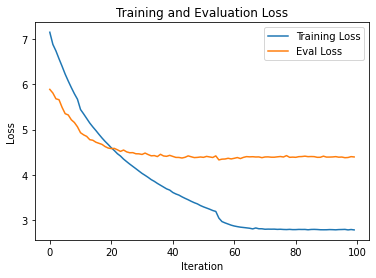

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the training losses and perplexities
plt.plot(plot_train_losses, label='Training Loss')
# plt.plot(perplexity_train, label='Training Perplexity')
plt.plot(plot_eval_losses, label='Eval Loss')
# plt.plot(perplexity_eval, label='Eval Perplexity')

# Add a legend and labels to the plot
plt.legend()
plt.title('Training and Evaluation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss ')

# Show the plot
plt.show()


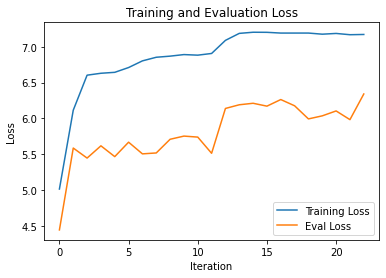

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the training losses and perplexities
plt.plot(plot_train_losses, label='Training Loss')
# plt.plot(perplexity_train, label='Training Perplexity')
plt.plot(plot_eval_losses, label='Eval Loss')
# plt.plot(perplexity_eval, label='Eval Perplexity')

# Add a legend and labels to the plot
plt.legend()
plt.title('Training and Evaluation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss ')

# Show the plot
plt.show()


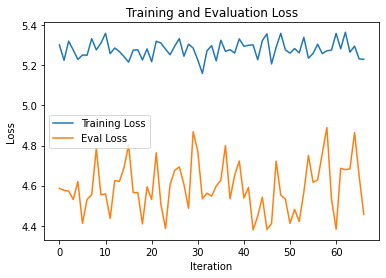

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the training losses and perplexities
plt.plot(plot_train_losses, label='Training Loss')
# plt.plot(perplexity_train, label='Training Perplexity')
plt.plot(plot_eval_losses, label='Eval Loss')
# plt.plot(perplexity_eval, label='Eval Perplexity')

# Add a legend and labels to the plot
plt.legend()
plt.title('Training and Evaluation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss ')

# Show the plot
plt.show()


# Stage 7: Import all saved data

In [9]:
# Resources: https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html
# Had to modify & adapt most of the code in the tutorial since this isn't translation & data preprocessing is different

SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

input_lang = Lang("input")
output_lang = Lang("output")

# input_lang , output_lang , pairs, pairs_nonclick, pairs_click  = prepareData()

INPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_input_lang_dec_18.pt"
OUTPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_output_lang_dec_18.pt"

PAIRS_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs_dec_18.pt"
PAIRS_NON_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs-nonclick_dec_18.pt"
PAIRS_CLICK_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs-click_dec_18.pt"


input_lang = torch.load(INPUT_MAIN_PATH)
output_lang = torch.load(OUTPUT_MAIN_PATH)

# pairs, pairs_nonclick, pairs_click 
pairs = torch.load( PAIRS_PATH)
pairs_nonclick = torch.load( PAIRS_NON_PATH)
pairs_click = torch.load(PAIRS_CLICK_PATH)


INPUT_LANG_EMBED = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_INPUT_LANG_EMBED.pt"
OUTPUT_LANG_EMBED = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_OUTPUT_LANG_EMBED.pt"

embedding_matrix_ft_input = torch.load(INPUT_LANG_EMBED)
embedding_matrix_ft_output = torch.load( OUTPUT_LANG_EMBED)

In [10]:
TRAIN_DATA_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs-TRAINING.pt"
TEST_DATA_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_pairs-TESTING.pt"

train_data = torch.load(TRAIN_DATA_PATH)
test_data = torch.load(TEST_DATA_PATH)

print(f"Number of training examples: {len(train_data)}")
print(f"Number of testing examples: {len(test_data)}")
print(f"{train_data[0]}")
print(test_data[0])

Number of training examples: 14250
Number of testing examples: 750
[' dan jessi terancam kena pasal seksual celana dalam ', 'hyuna dan jessi terancam kena pasal seksual gara-gara umbar celana dalam ?', 1]
['bekasi gandeng 3 perusahaan olah sampah jadi listrik', 'bekasi gandeng 3 perusahaan olah sampah jadi listrik', 0]


# Stage 8: SECOND TRAINING

In [ ]:
dN_EPOCHS_2 = 100

for epoch in range(dN_EPOCHS_2):

    start_time = time.time()

    train_loss = trainIters(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        encoder_optimizer,
        style_embedder_optimizer,
        decoder_optimizer,
        TRAINING_DATASET_SIZE,
        print_every=200
    )


    valid_loss = evaluating(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        EVALUATION_DATASET_SIZE,
        plot_every=100)

    encoder_scheduler.step(valid_loss)
    decoder_scheduler.step(valid_loss)
    style_embedder_scheduler.step(valid_loss)

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss

        torch.save({
            'epoch': epoch,
            'encoder1_state_dict': encoder1.state_dict(),
            'style_embedder1-model': style_embedder1.state_dict(),
            'decoder1_state_dict': decoder1.state_dict(),
            'encoder1_optimizer_state_dict': encoder_optimizer.state_dict(),
            'decoder1_optimizer_state_dict': decoder_optimizer.state_dict(),
            'style_embedder1_optimizer_state_dict': style_embedder_optimizer.state_dict(),
            'loss': train_loss,
        }, PATH)

    plot_train_losses.append(train_loss)
    plot_eval_losses.append(valid_loss)

    perplexity_train.append(math.exp(train_loss))
    perplexity_eval.append(math.exp(valid_loss))
    
    torch.save({
      'plot_train_losses' : plot_train_losses,
      'plot_eval_losses':  plot_eval_losses,
      'perplexity_train': perplexity_train, 
      "perplexity_eval" : perplexity_eval, 
    }, ACCURACY_PATH )

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    print("Done")

In [ ]:
ACCURACY_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_ACCURACY_dec19_DROP_128_LOWLR_EXP2.pt"
checkpoint_metrics = torch.load(ACCURACY_PATH)
plot_train_losses =  checkpoint_metrics['plot_train_losses']
plot_eval_losses = checkpoint_metrics['plot_eval_losses']
perplexity_train = checkpoint_metrics['perplexity_train']
perplexity_eval = checkpoint_metrics['perplexity_eval']

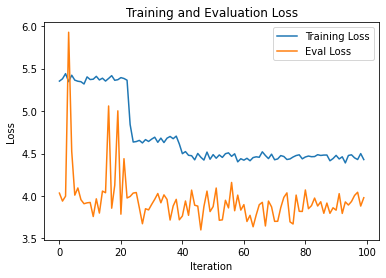

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the training losses and perplexities
plt.plot(plot_train_losses, label='Training Loss')
# plt.plot(perplexity_train, label='Training Perplexity')
plt.plot(plot_eval_losses, label='Eval Loss')
# plt.plot(perplexity_eval, label='Eval Perplexity')

# Add a legend and labels to the plot
plt.legend()
plt.title('Training and Evaluation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss ')

# Show the plot
plt.show()


# Stage 8: Load the previous model

In [ ]:
INPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_input_lang_dec_15_dec_16.pt"
OUTPUT_MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/deleteOnly_output_lang_dec_15_dec_16.pt"
PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_model_dec_15_512_scheduler_dec16.pt"
MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/"
ACCURACY_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_losses_dec_15_512_dec16.pt"


In [ ]:
# Resources: https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html
# Had to modify & adapt most of the code in the tutorial since this isn't translation & data preprocessing is different

SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

input_lang = Lang("input")
output_lang = Lang("output")

input_lang = torch.load(INPUT_MAIN_PATH)
output_lang = torch.load(OUTPUT_MAIN_PATH)

In [ ]:
word_vec_size = ft.vector_size

hidden_size = 512
style_vec_size = 128

encoder1 = EncoderRNN(input_lang.n_words, word_vec_size, hidden_size, embedding_matrix_ft_input).to(device)
decoder1 = DecoderRNN(hidden_size + style_vec_size, word_vec_size, output_lang.n_words, embedding_matrix_ft_output).to(device)

style_embedder1 = StyleEmbedder(2, style_vec_size).to(device)

In [ ]:
n_t = len(train_data)
n_e = len(test_data)
N_EPOCHS = 60
best_valid_loss = float('inf')

# # learning_rate=0.1
# # learning_rate = 0.001

# # encoder_optimizer = optim.Adadelta(encoder1.parameters(), lr=learning_rate)
# # decoder_optimizer = optim.Adadelta(decoder1.parameters(), lr=learning_rate)
# # style_embedder_optimizer = optim.Adadelta(style_embedder1.parameters(), lr=learning_rate)

# # encoder_optimizer = optim.Adam(encoder1.parameters(),lr=learning_rate)
# # decoder_optimizer = optim.Adam(decoder1.parameters(), lr=learning_rate)
# # style_embedder_optimizer = optim.Adam(style_embedder1.parameters(), lr=learning_rate)

# # encoder_optimizer = optim.SGD(encoder1.parameters(), lr=learning_rate)
# # decoder_optimizer = optim.SGD(decoder1.parameters(), lr=learning_rate)
# # style_embedder_optimizer = optim.SGD(style_embedder1.parameters(), lr=learning_rate)
# #
# # encoder_optimizer = optim.RMSprop(encoder1.parameters(), lr=learning_rate)
# # decoder_optimizer = optim.RMSprop(decoder1.parameters(), lr=learning_rate)
# # style_embedder_optimizer = optim.RMSprop(style_embedder1.parameters(), lr=learning_rate)


encoder_learning_rate = 0.001
decoder_learning_rate = 0.001
style_embedder_learning_rate = 0.001

# Use different optimization algorithms for each optimizer
encoder_optimizer = optim.Adam(encoder1.parameters(), lr=encoder_learning_rate)
decoder_optimizer = optim.SGD(decoder1.parameters(), lr=decoder_learning_rate)
style_embedder_optimizer = optim.Adam(style_embedder1.parameters(), lr=style_embedder_learning_rate)

# Use a learning rate schedule to adjust the learning rates during training
encoder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(encoder_optimizer, 'min')
decoder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(decoder_optimizer, 'min')
style_embedder_scheduler = optim.lr_scheduler.ReduceLROnPlateau(style_embedder_optimizer, 'min')

criterion1 = nn.CrossEntropyLoss()



# PATH = "delete_only_model.pt"
# PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_model_dec_15_512_scheduler.pt"
# MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/"

# criterion1 = nn.NLLLoss()


plot_train_losses = []
plot_eval_losses = []
perplexity_train = []
perplexity_eval = []


In [ ]:
import torch

# Create the models and optimizers
# encoder1 = Encoder()
# style_embedder1 = StyleEmbedder()
# decoder1 = Decoder()
# encoder_optimizer = optim.Adam(encoder1.parameters())
# decoder_optimizer = optim.Adam(decoder1.parameters())
# style_embedder_optimizer = optim.Adam(style_embedder1.parameters())

# Load the saved state dictionaries and optimizer state dictionaries
checkpoint = torch.load(PATH)
encoder1.load_state_dict(checkpoint['encoder1_state_dict'])
style_embedder1.load_state_dict(checkpoint['style_embedder1-model'])
decoder1.load_state_dict(checkpoint['decoder1_state_dict'])
encoder_optimizer.load_state_dict(checkpoint['encoder1_optimizer_state_dict'])
decoder_optimizer.load_state_dict(checkpoint['decoder1_optimizer_state_dict'])
style_embedder_optimizer.load_state_dict(checkpoint['style_embedder1_optimizer_state_dict'])


# # Save the epoch and loss values
# epoch = checkpoint['epoch']
# train_loss = checkpoint['loss']


    # torch.save({
    #   'plot_train_losses' : plot_train_losses,
    #   'plot_eval_losses':  plot_eval_losses,
    #   'perplexity_train': perplexity_train, 
    #   "perplexity_eval" : perplexity_eval, 
    # }, ACCURACY_PATH )

checkpoint_metrics = torch.load(ACCURACY_PATH)
plot_train_losses =  checkpoint_metrics['plot_train_losses']
plot_eval_losses = checkpoint_metrics['plot_eval_losses']
perplexity_train = checkpoint_metrics['perplexity_train']
perplexity_eval = checkpoint_metrics['perplexity_eval']
iteration = checkpoint['iteration']


In [ ]:
TRAINING_DATASET_SIZE = n_t - 1000
EVALUATION_DATASET_SIZE = n_e - 20

In [ ]:
print(TRAINING_DATASET_SIZE)
print(EVALUATION_DATASET_SIZE)

In [ ]:
# ACCURACY_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_losses_dec_15_512.pt"
N_EPOCHS_2 = 10
for epoch in range(N_EPOCHS_2):

    start_time = time.time()

    train_loss = trainIters(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        encoder_optimizer,
        style_embedder_optimizer,
        decoder_optimizer,
        TRAINING_DATASET_SIZE,
        print_every=200
    )

    # valid_loss = evaluating(encoder_a, encoder_c, decoder, criterion, EVALUATION_DATASET_SIZE, plot_every=20)

    valid_loss = evaluating(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        EVALUATION_DATASET_SIZE,
        plot_every=100)

    encoder_scheduler.step(valid_loss)
    decoder_scheduler.step(valid_loss)
    style_embedder_scheduler.step(valid_loss)

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    plot_train_losses.append(train_loss)
    plot_eval_losses.append(valid_loss)

    perplexity_train.append(math.exp(train_loss))
    perplexity_eval.append(math.exp(valid_loss))


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(encoder1.state_dict(), MAIN_PATH + 'encoder1-model_dec15.pt')
        torch.save(style_embedder1.state_dict(),MAIN_PATH + 'style_embedder1-model_dec15.pt')
        torch.save(decoder1.state_dict(),MAIN_PATH +  'decoder1-model_dec15.pt')

        torch.save({
            'epoch': epoch,
            'encoder1_state_dict': encoder1.state_dict(),
            'style_embedder1-model': style_embedder1.state_dict(),
            'decoder1_state_dict': decoder1.state_dict(),
            'encoder1_optimizer_state_dict': encoder_optimizer.state_dict(),
            'decoder1_optimizer_state_dict': decoder_optimizer.state_dict(),
            'style_embedder1_optimizer_state_dict': style_embedder_optimizer.state_dict(),
            'loss': train_loss,
        }, PATH)

    # if valid_loss < best_valid_loss:
    #     best_valid_loss = valid_loss
    #     torch.save(encoder1.state_dict(), 'encoder1-model.pt')
    #     torch.save(style_embedder1.state_dict(), 'style_embedder1-model.pt')
    #     torch.save(decoder1.state_dict(), 'decoder1-model.pt')



    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    print("Done")



Streaming output truncated to the last 5000 lines.
[' kesehatan besok - kesehatan jumat 20 september 2019 virgo & aquarius diet', 'zodiak kesehatan besok - ramalan zodiak kesehatan jumat 20 september 2019 virgo & aquarius diet', 1]
10683
['komentar marquez dan rossi soal insiden sesi kualifikasi gp san marino', 'komentar marquez dan rossi soal insiden sesi kualifikasi gp san marino', 1]
10684
['netanyahu janji caplok lebih banyak wilayah tepi barat jika menang pemilu', 'netanyahu janji caplok lebih banyak wilayah tepi barat jika menang pemilu', 0]
10685
['agensi bicara tentang kembalinya mina di ', 'agensi bicara tentang kembalinya mina di comeback twice', 0]
10686
['mampukah indonesia jadi negara maju di 2045 ', 'mampukah indonesia jadi negara maju di 2045 ?', 1]
10687
['ajak warga cinta lingkungan , iwan fals gelar konser karya semesta', 'ajak warga cinta lingkungan , iwan fals gelar konser karya semesta', 0]
10688
['buronan hingga sempat rekam , 4 korban selamat kecelakaan nganjuk-m

IndexError: ignored

# Create Clickbait title for Nonclickbait dataset

In [ ]:
encoder = encoder1
decoder = decoder1
style_embedder = style_embedder1

In [ ]:
# input_lang, output_lang, pairs, pairs_nonclick, pairs_nonclick  = prepareData()

In [ ]:
def encoderStep_deleteOnly(encoder, style_embedder, sentence, style, max_length=MAX_LENGTH):
    input_tensor = tensorFromSentence(input_lang, sentence)
    style_tensor = tensorFromStyle(style)

    input_length = input_tensor.size()[0]
    encoder_hidden = encoder.initHidden()

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                 encoder_hidden)
        encoder_outputs[ei] += encoder_output[0, 0]
    style_embedding = style_embedder(style_tensor)
    return torch.cat((encoder_hidden, style_embedding), 2)



ALPHA = 0.7

class Node:
    def __init__(self, p_t, i, d_hidden, lvl, node_parent=None):
        self.p_t = p_t
        self.i = i
        self.d_hidden = d_hidden
        self.lvl = lvl
        self.node_parent = node_parent
        
        self.p_sentence = self.sentenceProb()
    
    def prepareToDecode(self):
        d_in = self.i.squeeze()#.detatch()
        return d_in, self.d_hidden
    
    def sentenceProb(self):
        if self.node_parent == None:
            return self.p_t
        return self.node_parent.sentenceProb() + self.p_t #addition because of log
    
    def normProb(self):
        #Normalised probability - deprecated
#         return 1/((self.lvl+1)**ALPHA) * self.sentenceProb()
        #perplexity
        return torch.exp(self.sentenceProb()) ** (-1/(self.lvl+1))
    
    def getToken(self):
        return output_lang.index2word[self.i.item()]
    
    def getTokens(self):
        token = [self.getToken()]
#         print(token)
        if(self.node_parent == None):
            return token
        else:
             return self.node_parent.getTokens() + token
#         return tokens
    def getSentence(self):
        return ' '.join(self.getTokens())
# Normalize 1/num words^alpha (alpha = 0.7)

In [ ]:
BEAM_WIDTH = 10

def evaluate_deleteOnly(encoder, style_embedder, decoder, sentence, style, max_length=MAX_LENGTH):
    with torch.no_grad():    
        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoderStep_deleteOnly(encoder, style_embedder, sentence, style)
        decoded_words = []

        nodes = []
        finished_nodes = []
        for di in range(max_length):
            if di == 0:
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                top_ps, top_is = decoder_output.data.topk(BEAM_WIDTH)

                top_ps = top_ps.view(-1)
                top_is = top_is.view(-1)

                for index in range(len(top_is)):
                    p_t = top_ps[index]
                    i = top_is[index]
                    nodes.append(Node(p_t, i, decoder_hidden, di))

            else:
                prev_nodes = [x for x in nodes if x.lvl == di-1]
                prev_nodes = sorted(prev_nodes, key=lambda x: x.p_sentence.item(), reverse=True)
                prev_nodes = prev_nodes[:BEAM_WIDTH]

                nodes = []
                for node in prev_nodes:
                    decoder_output, decoder_hidden = decoder(*node.prepareToDecode())
                    top_ps, top_is = decoder_output.data.topk(BEAM_WIDTH)
                    top_ps = top_ps.view(-1)
                    top_is = top_is.view(-1)    
                    
                    for index in range(len(top_is)):
                        p_t = top_ps[index]
                        i = top_is[index]
                        child_node = Node(p_t, i, decoder_hidden, di, node)
                        
                        if i.item() == EOS_token:
                            finished_nodes.append(child_node)
                        else:
                            nodes.append(child_node)
                            
        final_node = sorted(finished_nodes, key=lambda x: x.p_sentence.item(), reverse=True)[0]
        return final_node.getSentence()
# evaluate_deleteOnly(encoder1, style_embedder1, decoder1, "the food", 1)

In [ ]:
def evaluateRandomly(encoder, style_embedder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        print('style: ', pair[2])
        
        
        output_words = evaluate_deleteOnly(encoder, style_embedder, decoder, pair[0], pair[2])
        output_sentence = ' '.join(output_words)
        
        print('<', output_sentence)
        print('')

def evaluateRandomly2(encoder, style_embedder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        print('style: ', pair[2])
        
        
        output_words = evaluate_deleteOnly(encoder, style_embedder, decoder, pair[0], 0)
        output_sentence = ' '.join(output_words)
        
        print('<', output_sentence)
        print('')

In [ ]:
evaluateRandomly2(encoder1, style_embedder1, decoder1)

> gocar resmi beroperasi di bandara soekarno-hatta
= gocar resmi beroperasi di bandara soekarno-hatta
style:  0
< g o c a r   p r o y e k   b e r o p e r a s i   d i   b a n d a r a   s o e k a r n o - h a t t a   E O S

>  motor nyebrang sungai ala flying fox , colek kementerian pupr
= viral motor nyebrang sungai ala flying fox , netizen colek kementerian pupr
style:  1
< b o t o l   m o t o r   s u n g a i   s u n g a i   m i n y a k   d e n g a n   m i n y a k   ,   n e t i z e n   ,   k u d u s   E O S

> mensesneg siapkan draf , jokowi bakal terbitkan perppu untuk kpk 
= mensesneg siapkan draf , jokowi bakal terbitkan perppu untuk kpk ?
style:  1
< r k u h p   g e l a r   i n v e s t a s i   ,   j o k o w i   b a k a l   b u a t   b a h a s   r u u   k p k   d i s a h k a n   E O S

> total , jumlah tersangka rusuh di papua ada 87 orang
= total , jumlah tersangka rusuh di papua ada 87 orang
style:  0
< t o t a l   ,   d u a   m a h a s i s w a   r u s u h   d i   p a p u a   j i k

# Retrained again at 17 December

In [ ]:
print("plot_train_losses")
print(plot_train_losses)

print("plot_eval_losses")
print(plot_eval_losses )

print("perplexity_train" )
print(perplexity_train )

print("perplexity_eval" )
print(perplexity_eval )

plot_train_losses
[7.005529635069425, 6.699265200084709, 6.381756733422616, 6.069959938892099, 5.790355372701792, 5.543380059807032, 5.314447089941987, 5.1036299328474835, 4.897923136668892, 4.703650494363527, 4.515460452806608, 4.338235304809176, 4.159913261000685, 3.9875564099402516, 3.8176959763198544, 3.66523023134419, 3.5021149827089877, 3.3645800648132744, 3.215164983438294, 3.0856280115588604, 2.9586023433819846, 2.8294666336084617, 2.7142906032198653, 2.593688281236336, 2.5070213422797827, 2.3959467670875836, 2.307352648218475, 2.224968113296315, 2.1382526824792376, 2.074252433482152, 2.0141103065638783, 1.9421391865373947, 1.876762465914096, 1.8327792398523242, 1.7852132337370066, 1.7162480753643083, 1.6791864725334353, 1.6438323615821455, 1.593639300909478, 1.5644508693512131, 1.5297762982118046, 1.4962815332905384, 1.479152984033667, 1.4578008764622925, 1.4403702184839522, 1.418800639187358, 1.3961254198501503, 1.3739730995625903, 1.341365585916353, 1.3085475692005082, 1.298

In [ ]:
PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_model_dec_16_512_scheduler_dec17.pt"
MAIN_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/"
ACCURACY_PATH = "/content/drive/MyDrive/nlp_research/2022_thesis_styletransfer/checkpoint/delete_only_losses_dec_16_512_dec17.pt"

In [ ]:
N_EPOCHS_2 = 20
for epoch in range(N_EPOCHS_2):

    start_time = time.time()

    train_loss = trainIters(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        encoder_optimizer,
        style_embedder_optimizer,
        decoder_optimizer,
        TRAINING_DATASET_SIZE,
        print_every=200
    )

    # valid_loss = evaluating(encoder_a, encoder_c, decoder, criterion, EVALUATION_DATASET_SIZE, plot_every=20)

    valid_loss = evaluating(
        encoder1,
        style_embedder1,
        decoder1,
        criterion1,
        EVALUATION_DATASET_SIZE,
        plot_every=100)

    encoder_scheduler.step(valid_loss)
    decoder_scheduler.step(valid_loss)
    style_embedder_scheduler.step(valid_loss)

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(encoder1.state_dict(), MAIN_PATH + 'encoder1-model_dec16_dec17.pt')
        torch.save(style_embedder1.state_dict(),MAIN_PATH + 'style_embedder1-model_dec16_dec17.pt')
        torch.save(decoder1.state_dict(),MAIN_PATH +  'decoder1-model_dec16_dec17.pt')

        torch.save({
            'epoch': epoch,
            'encoder1_state_dict': encoder1.state_dict(),
            'style_embedder1-model': style_embedder1.state_dict(),
            'decoder1_state_dict': decoder1.state_dict(),
            'encoder1_optimizer_state_dict': encoder_optimizer.state_dict(),
            'decoder1_optimizer_state_dict': decoder_optimizer.state_dict(),
            'style_embedder1_optimizer_state_dict': style_embedder_optimizer.state_dict(),
            'loss': train_loss,
        }, PATH)

    plot_train_losses.append(train_loss)
    plot_eval_losses.append(valid_loss)

    perplexity_train.append(math.exp(train_loss))
    perplexity_eval.append(math.exp(valid_loss))

    torch.save({
      'plot_train_losses' : plot_train_losses,
      'plot_eval_losses':  plot_eval_losses,
      'perplexity_train': perplexity_train, 
      "perplexity_eval" : perplexity_eval, 
    }, ACCURACY_PATH )


    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    print("Done")


Streaming output truncated to the last 5000 lines.
['netanyahu janji caplok lebih banyak wilayah tepi barat jika menang pemilu', 'netanyahu janji caplok lebih banyak wilayah tepi barat jika menang pemilu', 0]
10685
['agensi bicara tentang kembalinya mina di ', 'agensi bicara tentang kembalinya mina di comeback twice', 0]
10686
['mampukah indonesia jadi negara maju di 2045 ', 'mampukah indonesia jadi negara maju di 2045 ?', 1]
10687
['ajak warga cinta lingkungan , iwan fals gelar konser karya semesta', 'ajak warga cinta lingkungan , iwan fals gelar konser karya semesta', 0]
10688
['buronan hingga sempat rekam , 4 korban selamat kecelakaan nganjuk-madiun', 'buronan hingga sempat rekam video , 4 fakta mengejutkan korban selamat kecelakaan nganjuk-madiun', 1]
10689
['pesona jennie blackpink yang memikat , pernah nyanyi bareng seungri', 'pesona jennie blackpink yang memikat , pernah nyanyi bareng seungri', 0]
10690
['sudah cukupkah kandungan protein rambutmu ', 'sudah cukupkah kandungan pro